In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px

In [ ]:
body_performance_path = "bodyPerformance.csv"
gym_dataset_path = "megaGymDataset.csv"
food_dataset_path = "food.csv"

# Load the datasets
body_performance = pd.read_csv(body_performance_path)
gym_dataset = pd.read_csv(gym_dataset_path)
food_dataset = pd.read_csv(food_dataset_path)

print(f"Body Performance Dataset: {body_performance.shape[0]} rows, {body_performance.shape[1]} columns")
print(f"Gym Exercise Dataset: {gym_dataset.shape[0]} rows, {gym_dataset.shape[1]} columns")
print(f"Food Dataset: {food_dataset.shape[0]} rows, {food_dataset.shape[1]} columns")


Body Performance Dataset: 13393 rows, 12 columns
Gym Exercise Dataset: 2918 rows, 9 columns
Food Dataset: 7413 rows, 48 columns


# **1.1 Explore Body Performance Dataset**

In [ ]:
body_performance.head()


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
# Basic statistics
print("\nBasic statistics of the body performance dataset:")
body_performance.describe()


Basic statistics of the body performance dataset:


,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [ ]:
# Check for missing values
print("\nMissing values in the body performance dataset:")
print(body_performance.isnull().sum())


Missing values in the body performance dataset:
age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64



Distribution of fitness classes:
class
C    3349
D    3349
A    3348
B    3347
Name: count, dtype: int64


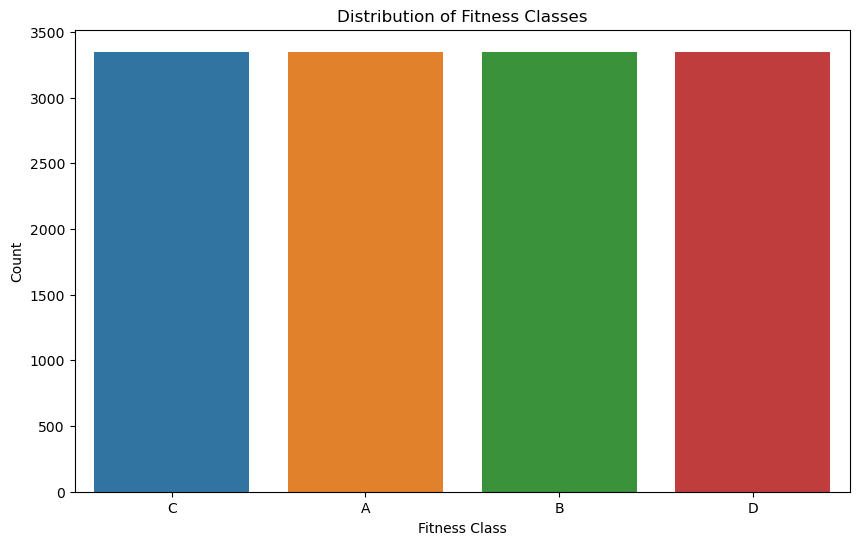

In [ ]:
# Distribution of fitness classes
print("\nDistribution of fitness classes:")
class_distribution = body_performance['class'].value_counts()
print(class_distribution)

# Visualize class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=body_performance)
plt.title('Distribution of Fitness Classes')
plt.xlabel('Fitness Class')
plt.ylabel('Count')
plt.show()


Distribution of gender:
gender
M    8467
F    4926
Name: count, dtype: int64


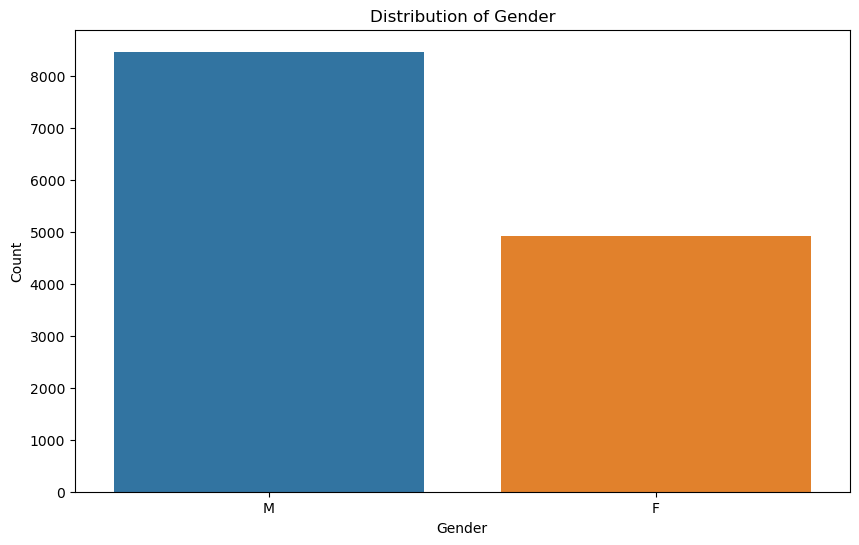

In [ ]:
# Distribution of gender
print("\nDistribution of gender:")
gender_distribution = body_performance['gender'].value_counts()
print(gender_distribution)

# Visualize gender distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=body_performance)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

C:\Users\Shwetha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


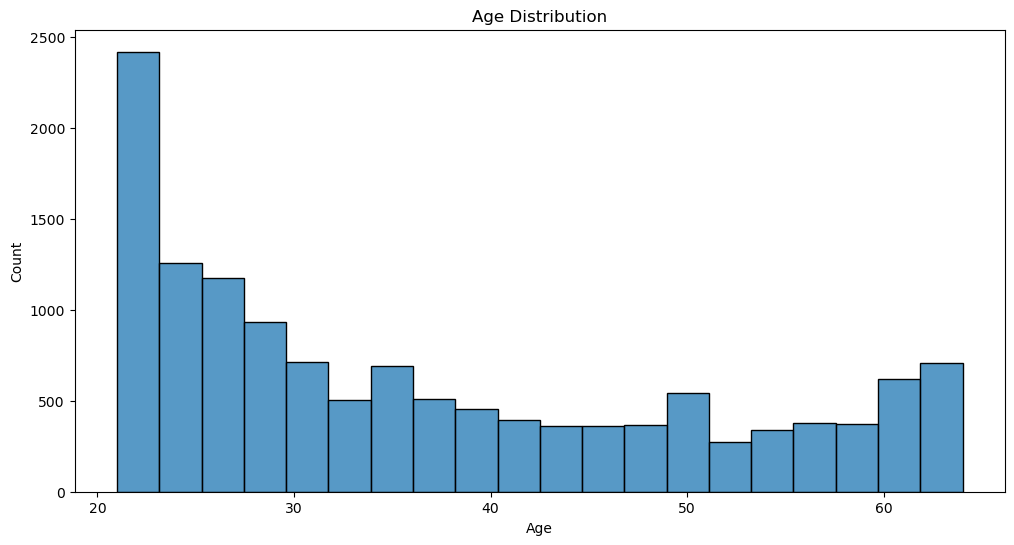

In [ ]:
# Age distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=body_performance, x='age', bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


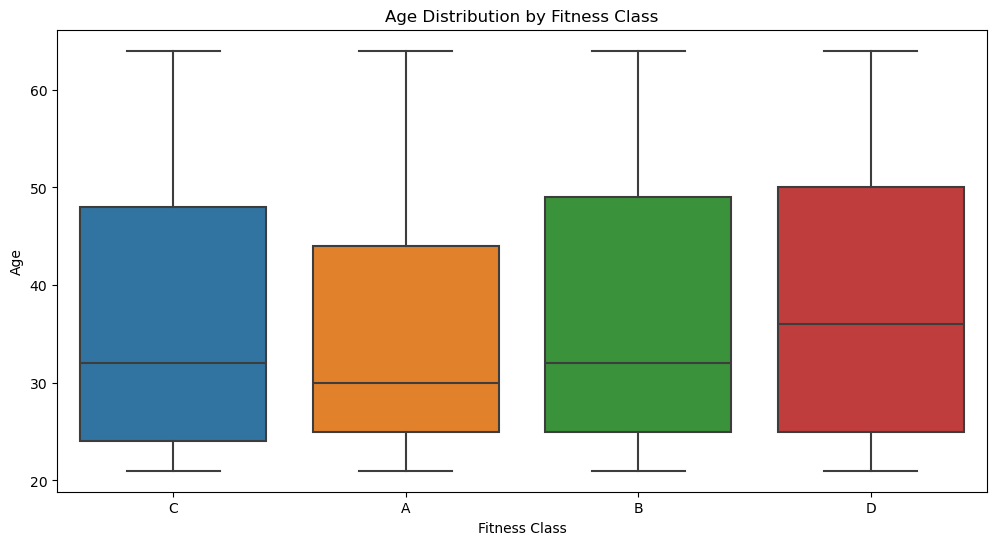

In [ ]:
# Visualize the relationship between age and fitness class
plt.figure(figsize=(12, 6))
sns.boxplot(x='class', y='age', data=body_performance)
plt.title('Age Distribution by Fitness Class')
plt.xlabel('Fitness Class')
plt.ylabel('Age')
plt.show()


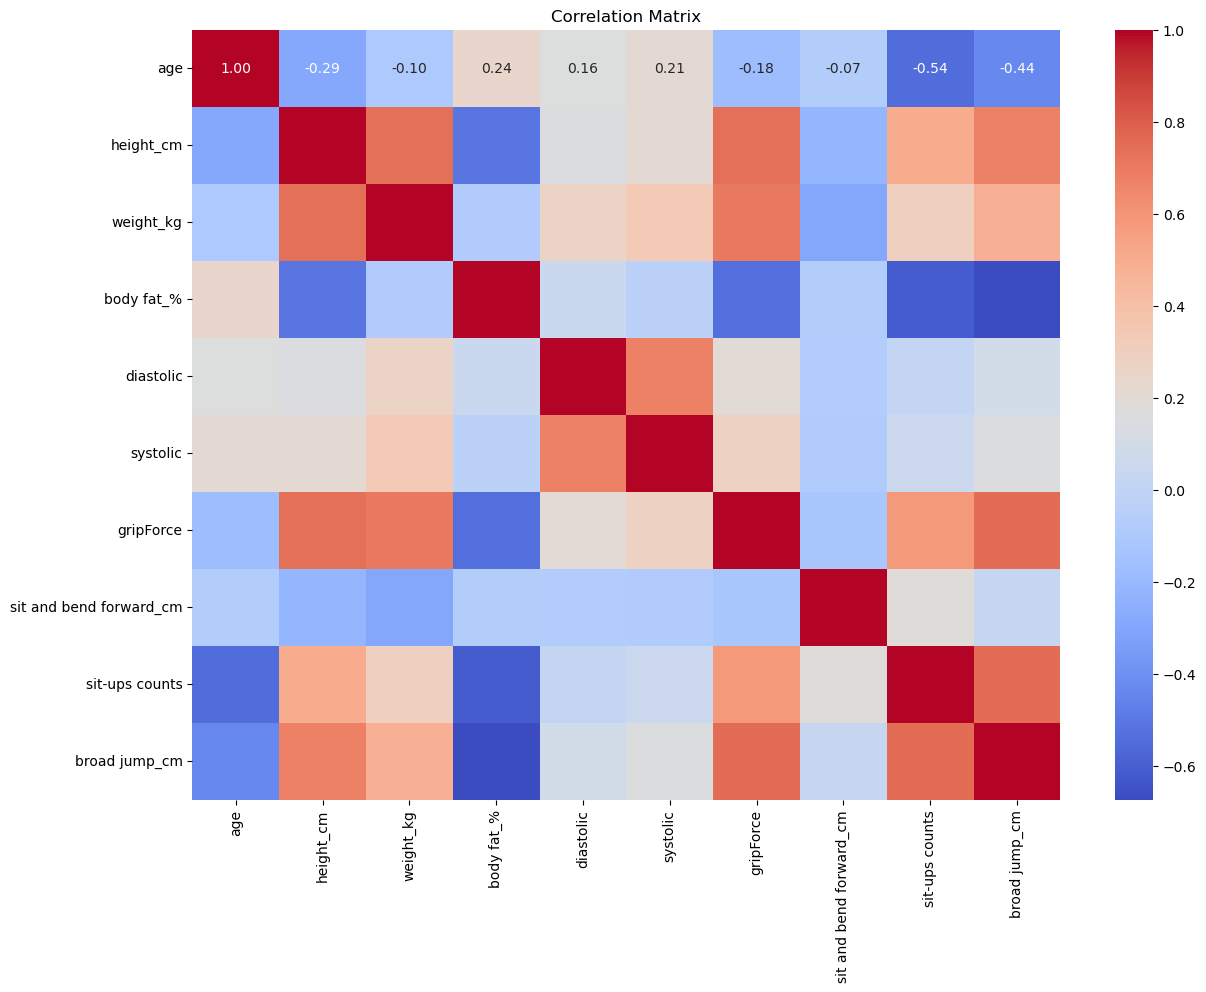

In [ ]:
# Create a correlation matrix for numerical features
plt.figure(figsize=(14, 10))
correlation_matrix = body_performance.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# 1.2 Explore Gym Exercise Dataset

In [ ]:
# Let's examine the gym exercise dataset
print("First 5 rows of the gym exercise dataset:")
gym_dataset.head()


First 5 rows of the gym exercise dataset:


,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


In [ ]:
# Check for missing values in the gym exercise dataset
print("\nMissing values in the gym exercise dataset:")
print(gym_dataset.isnull().sum())



Missing values in the gym exercise dataset:
Unnamed: 0       0
Title            0
Desc          1550
Type             0
BodyPart         0
Equipment       32
Level            0
Rating        1887
RatingDesc    2056
dtype: int64



Distribution of exercise types:
Type
Strength                 2545
Stretching                147
Plyometrics                97
Powerlifting               37
Cardio                     35
Olympic Weightlifting      35
Strongman                  22
Name: count, dtype: int64


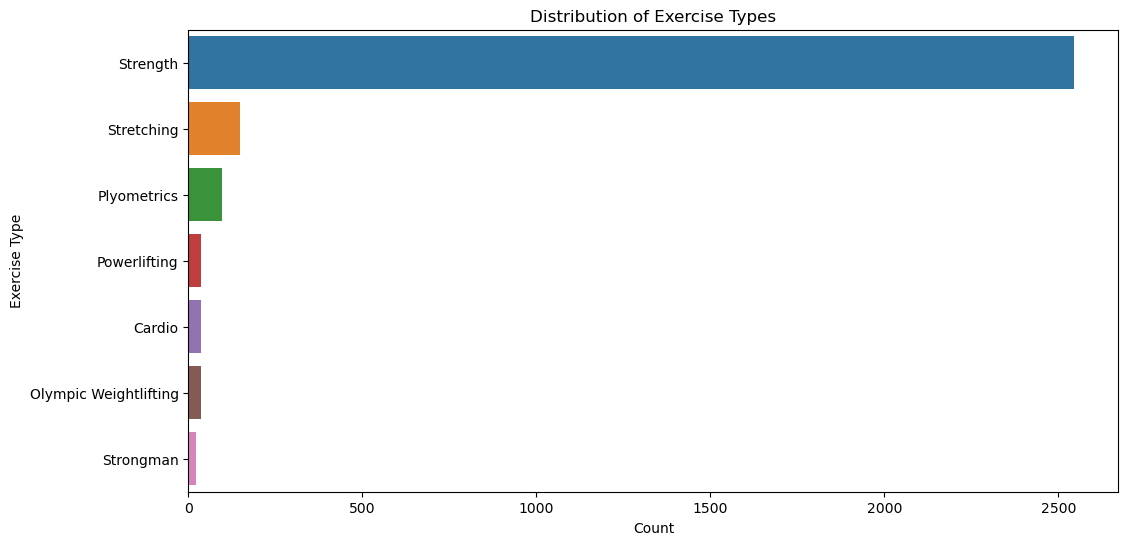

In [ ]:
# Distribution of exercise types
print("\nDistribution of exercise types:")
type_distribution = gym_dataset['Type'].value_counts()
print(type_distribution)

# Visualize type distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='Type', data=gym_dataset, order=type_distribution.index)
plt.title('Distribution of Exercise Types')
plt.xlabel('Count')
plt.ylabel('Exercise Type')
plt.show()



Distribution of body parts:
BodyPart
Abdominals     662
Quadriceps     646
Shoulders      340
Chest          262
Biceps         168
Triceps        151
Lats           124
Hamstrings     121
Middle Back    118
Lower Back      97
Glutes          81
Calves          47
Forearms        31
Traps           24
Abductors       21
Adductors       17
Neck             8
Name: count, dtype: int64


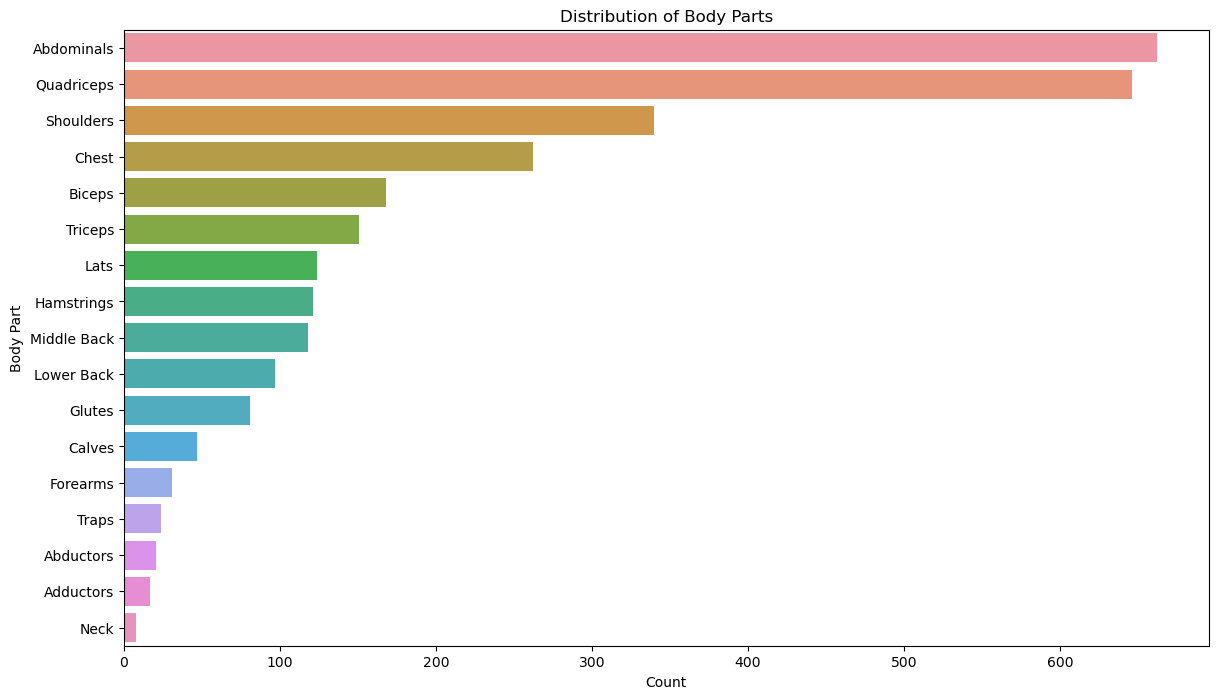

In [ ]:
# Distribution of body parts
print("\nDistribution of body parts:")
body_part_distribution = gym_dataset['BodyPart'].value_counts()
print(body_part_distribution)

# Visualize body part distribution
plt.figure(figsize=(14, 8))
sns.countplot(y='BodyPart', data=gym_dataset, order=body_part_distribution.index)
plt.title('Distribution of Body Parts')
plt.xlabel('Count')
plt.ylabel('Body Part')
plt.show()



Distribution of equipment:
Equipment
Body Only        1078
Dumbbell          516
Barbell           282
Other             254
Cable             226
Machine           175
Kettlebells       149
Bands             100
Medicine Ball      38
Exercise Ball      35
E-Z Curl Bar       22
Foam Roll          11
Name: count, dtype: int64


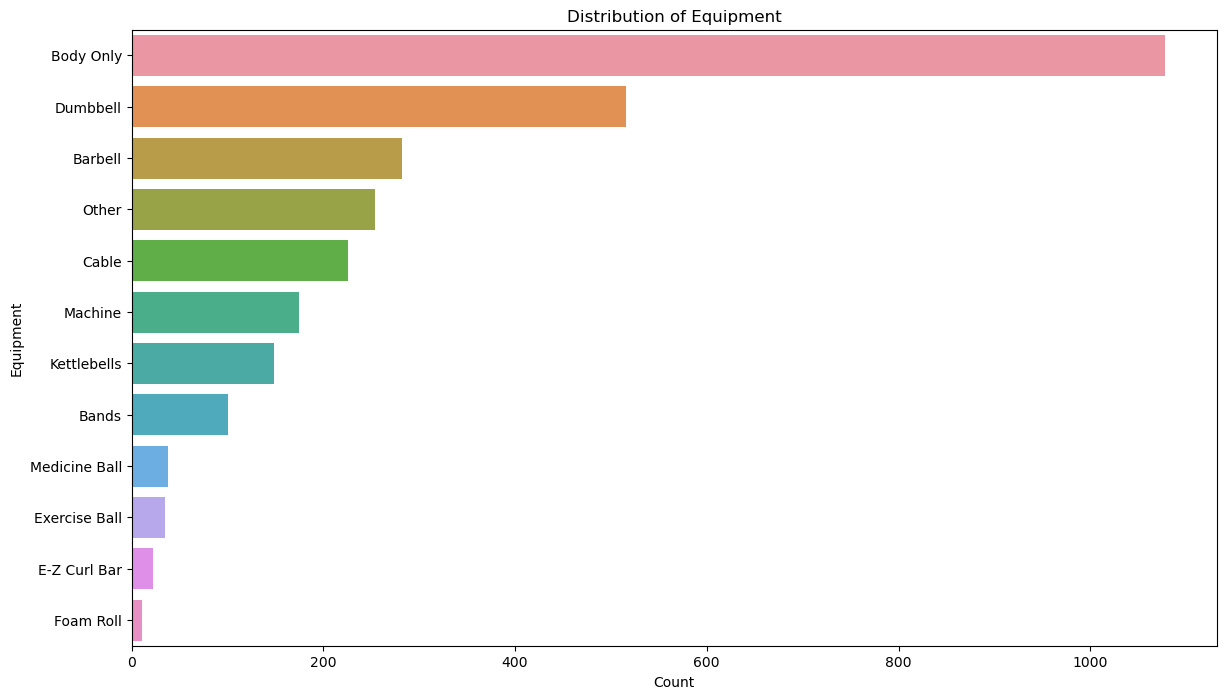

In [ ]:
# Distribution of equipment
print("\nDistribution of equipment:")
equipment_distribution = gym_dataset['Equipment'].value_counts()
print(equipment_distribution)

# Visualize equipment distribution
plt.figure(figsize=(14, 8))
sns.countplot(y='Equipment', data=gym_dataset, order=equipment_distribution.index)
plt.title('Distribution of Equipment')
plt.xlabel('Count')
plt.ylabel('Equipment')
plt.show()



Distribution of difficulty levels:
Level
Intermediate    2446
Beginner         459
Expert            13
Name: count, dtype: int64


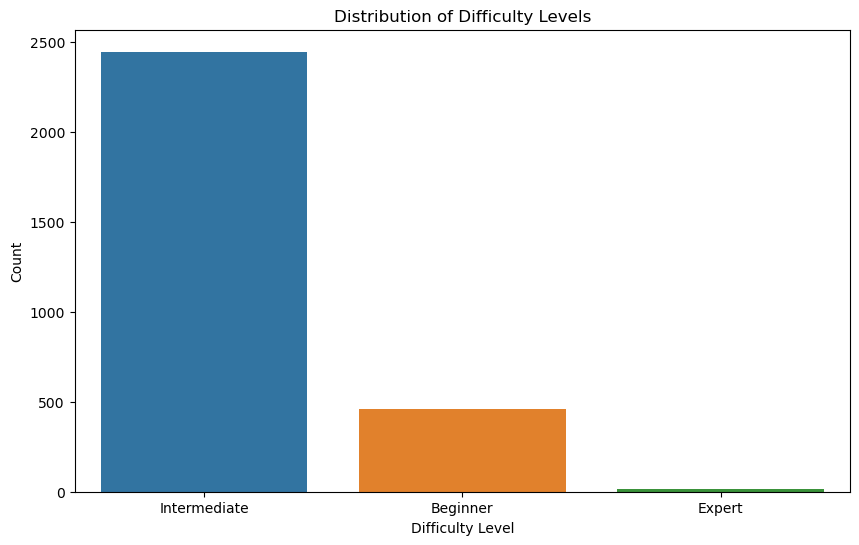

In [ ]:
# Distribution of difficulty levels
print("\nDistribution of difficulty levels:")
level_distribution = gym_dataset['Level'].value_counts()
print(level_distribution)

# Visualize level distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Level', data=gym_dataset, order=level_distribution.index)
plt.title('Distribution of Difficulty Levels')
plt.xlabel('Difficulty Level')
plt.ylabel('Count')
plt.show()

# *Explore food data set*

In [ ]:
# Let's examine the food dataset
print("First 5 rows of the food dataset:")
food_dataset.head()


First 5 rows of the food dataset:


,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,0.00,193,0,0.00,256,22,...,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,CHEESE,"CHEESE,BLUE",1004,0,5.11,74,0,2.34,75,15,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",1005,0,3.18,76,0,2.79,94,15,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5


In [ ]:
# Check the column names to understand the structure
print("\nColumns in the food dataset:")
print(food_dataset.columns)



Columns in the food dataset:
Index(['Category', 'Description', 'Nutrient Data Bank Number',
       'Data.Alpha Carotene', 'Data.Ash', 'Data.Beta Carotene',
       'Data.Beta Cryptoxanthin', 'Data.Carbohydrate', 'Data.Cholesterol',
       'Data.Choline', 'Data.Fiber', 'Data.Kilocalories',
       'Data.Lutein and Zeaxanthin', 'Data.Lycopene', 'Data.Manganese',
       'Data.Niacin', 'Data.Pantothenic Acid', 'Data.Protein',
       'Data.Refuse Percentage', 'Data.Retinol', 'Data.Riboflavin',
       'Data.Selenium', 'Data.Sugar Total', 'Data.Thiamin', 'Data.Water',
       'Data.Fat.Monosaturated Fat', 'Data.Fat.Polysaturated Fat',
       'Data.Fat.Saturated Fat', 'Data.Fat.Total Lipid',
       'Data.Household Weights.1st Household Weight',
       'Data.Household Weights.1st Household Weight Description',
       'Data.Household Weights.2nd Household Weight',
       'Data.Household Weights.2nd Household Weight Description',
       'Data.Major Minerals.Calcium', 'Data.Major Minerals.Copper',
 

In [ ]:
# Let's look at the key nutritional columns
key_columns = ['Category', 'Description', 'Data.Kilocalories', 'Data.Protein',
               'Data.Carbohydrate', 'Data.Fat.Total Lipid']

# Create a subset of the data with just these columns
food_subset = food_dataset[key_columns].copy()
food_subset.head(10)


,Category,Description,Data.Kilocalories,Data.Protein,Data.Carbohydrate,Data.Fat.Total Lipid
0,BUTTER,"BUTTER,WITH SALT",717,0.85,0.06,81.11
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",717,0.85,0.06,81.11
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",876,0.28,0.00,99.48
3,CHEESE,"CHEESE,BLUE",353,21.40,2.34,28.74
4,CHEESE,"CHEESE,BRICK",371,23.24,2.79,29.68
5,CHEESE,"CHEESE,BRIE",334,20.75,0.45,27.68
6,CHEESE,"CHEESE,CAMEMBERT",300,19.80,0.46,24.26
7,CHEESE,"CHEESE,CARAWAY",376,25.18,3.06,29.20
8,CHEESE,"CHEESE,CHEDDAR",403,24.90,1.28,33.14
9,CHEESE,"CHEESE,CHESHIRE",387,23.37,4.78,30.60



Top 20 food categories:
Category
BEEF                     457
PORK                     304
CEREALS RTE              291
BABYFOOD                 221
LAMB                     198
No Category              198
SOUP                     188
CHICKEN                  163
CEREALS                  132
FAST FOODS               130
CANDIES                  129
TURKEY                   124
CAMPBELL SOUP COMPANY    107
BEANS                    106
VEAL                      86
MCDONALD'S                82
CHEESE                    73
POTATOES                  72
COOKIES                   63
ALCOHOLIC BEV             62
Name: count, dtype: int64


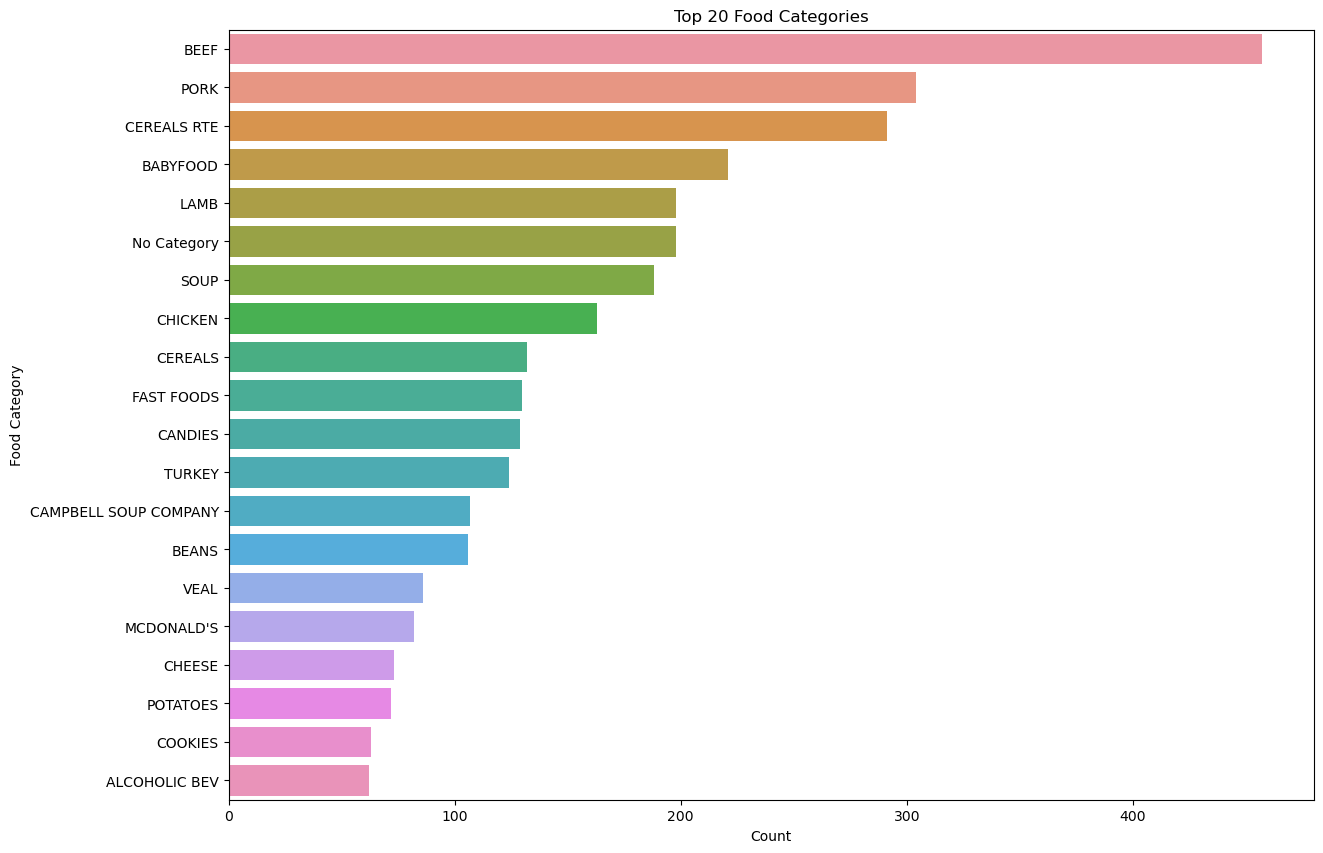

In [ ]:
# Distribution of food categories
print("\nTop 20 food categories:")
category_distribution = food_dataset['Category'].value_counts().head(20)
print(category_distribution)

# Visualize category distribution (top 20)
plt.figure(figsize=(14, 10))
sns.countplot(y='Category', data=food_dataset, order=category_distribution.index)
plt.title('Top 20 Food Categories')
plt.xlabel('Count')
plt.ylabel('Food Category')
plt.show()


C:\Users\Shwetha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


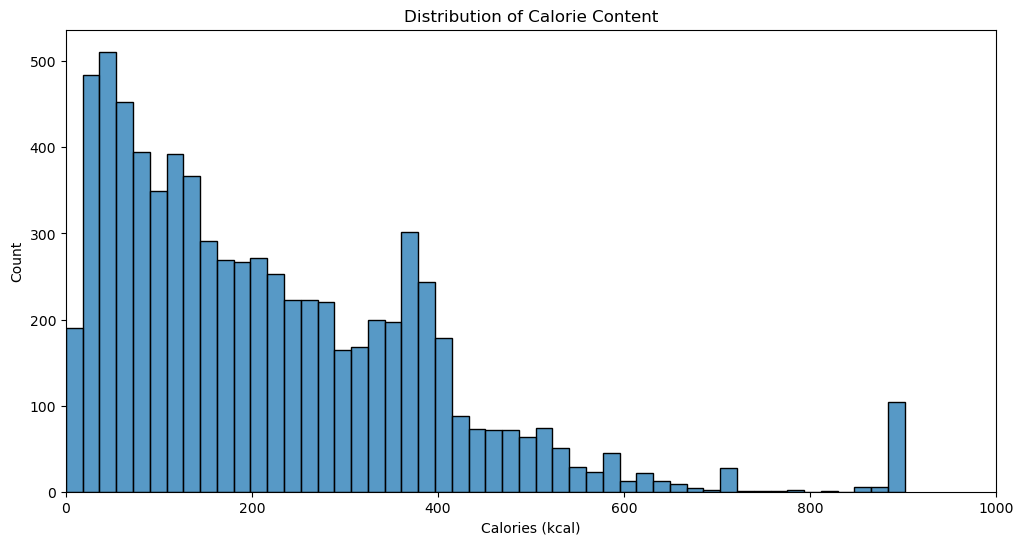

In [ ]:
# Distribution of calorie content
plt.figure(figsize=(12, 6))
sns.histplot(data=food_subset, x='Data.Kilocalories', bins=50)
plt.title('Distribution of Calorie Content')
plt.xlabel('Calories (kcal)')
plt.ylabel('Count')
plt.xlim(0, 1000)  # Limit to 1000 calories for better visualization
plt.show()


C:\Users\Shwetha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shwetha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shwetha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


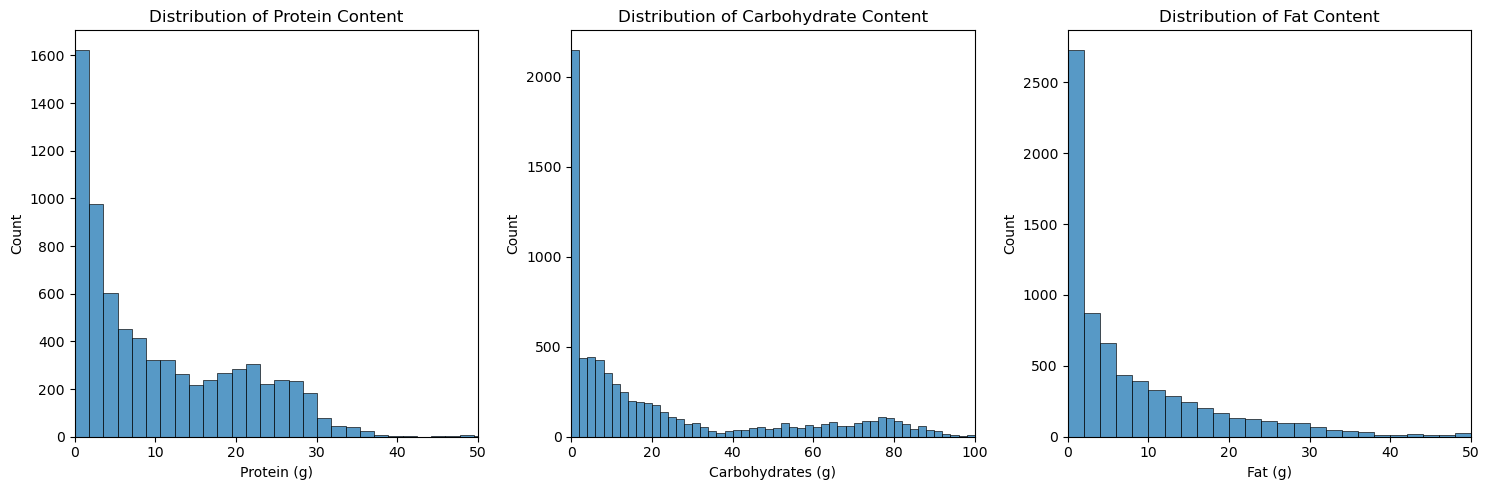

In [ ]:
# Explore the distribution of macronutrients
plt.figure(figsize=(15, 5))

# Protein distribution
plt.subplot(1, 3, 1)
sns.histplot(data=food_subset, x='Data.Protein', bins=50)
plt.title('Distribution of Protein Content')
plt.xlabel('Protein (g)')
plt.ylabel('Count')
plt.xlim(0, 50)  # Limit to 50g for better visualization

# Carbohydrate distribution
plt.subplot(1, 3, 2)
sns.histplot(data=food_subset, x='Data.Carbohydrate', bins=50)
plt.title('Distribution of Carbohydrate Content')
plt.xlabel('Carbohydrates (g)')
plt.ylabel('Count')
plt.xlim(0, 100)  # Limit to 100g for better visualization

# Fat distribution
plt.subplot(1, 3, 3)
sns.histplot(data=food_subset, x='Data.Fat.Total Lipid', bins=50)
plt.title('Distribution of Fat Content')
plt.xlabel('Fat (g)')
plt.ylabel('Count')
plt.xlim(0, 50)  # Limit to 50g for better visualization

# Adjust layout
plt.tight_layout()
plt.show()


# *Preprocessing the Dataset one by one*

In [ ]:
from sklearn.preprocessing import StandardScaler

def preprocess_performance_data(data):
    """Preprocess the body performance dataset"""
    # Create a copy to avoid modifying the original
    processed_data = data.copy()

    # Drop rows with missing values
    processed_data = processed_data.dropna()

    # Create fitness score feature (simplified)
    processed_data['fitness_score'] = (
        processed_data['sit-ups counts'] * 0.2 +
        processed_data['broad jump_cm'] * 0.2 +
        processed_data['gripForce'] * 0.2 -
        processed_data['body fat_%'] * 0.4
    )

    # Calculate BMI
    processed_data['bmi'] = processed_data['weight_kg'] / ((processed_data['height_cm']/100) ** 2)

    # Encode gender
    processed_data['gender_code'] = processed_data['gender'].map({'M': 1, 'F': 0})

    # Normalize numerical features
    num_features = ['age', 'height_cm', 'weight_kg', 'body fat_%',
                   'diastolic', 'systolic', 'gripForce',
                   'sit and bend forward_cm', 'sit-ups counts',
                   'broad jump_cm', 'fitness_score', 'bmi']

    scaler = StandardScaler()
    processed_data[num_features] = scaler.fit_transform(processed_data[num_features])

    return processed_data, scaler

# Preprocess the body performance data
processed_body_performance, performance_scaler = preprocess_performance_data(body_performance)
processed_body_performance.head()


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,fitness_score,bmi,gender_code
0,-0.717432,M,0.443873,0.652150,-0.267367,0.112009,-0.015959,1.688190,0.377317,1.416961,0.674009,C,0.977107,0.591047,1
1,-0.864220,M,-0.422465,-0.974734,-1.039081,-0.167278,-0.287820,-0.053073,0.128984,0.926634,0.975013,A,0.944497,-1.057576,1
2,-0.423857,M,1.310211,0.883127,-0.432734,1.229158,1.479276,0.737554,-0.379509,0.646446,-0.229005,C,0.201553,0.195664,1
3,-0.350463,M,0.704961,0.305684,-0.667004,-0.260374,1.139450,0.417538,-0.001096,0.926634,0.724176,B,0.797043,-0.087204,1
4,-0.644038,M,0.621888,0.021147,-0.846152,-0.818948,-0.219855,0.615195,1.406129,0.366259,0.674009,B,0.721897,-0.405864,1


In [ ]:
def preprocess_gym_data(data):
    """Preprocess the gym exercise dataset"""
    # Create a copy to avoid modifying the original
    processed_data = data.copy()

    # Clean and standardize data
    processed_data = processed_data.fillna({
        'Rating': data['Rating'].mean(),
        'RatingDesc': 'Not rated',
        'Equipment': 'Body Only',
        'Level': 'Intermediate'
    })

    # Create a feature to indicate if the exercise is compound (simplified)
    processed_data['is_compound'] = processed_data['BodyPart'].apply(
        lambda x: 1 if x in ['Back', 'Legs', 'Chest'] else 0
    )

    # One-hot encode categorical features (e.g., 'BodyPart' and 'Equipment')
    processed_data = pd.get_dummies(processed_data, columns=['BodyPart', 'Equipment'], drop_first=True)

    return processed_data

# Preprocess the gym data
processed_gym_data = preprocess_gym_data(gym_dataset)
processed_gym_data.head()


,Unnamed: 0,Title,Desc,Type,Level,Rating,RatingDesc,is_compound,BodyPart_Abductors,BodyPart_Adductors,...,Equipment_Body Only,Equipment_Cable,Equipment_Dumbbell,Equipment_E-Z Curl Bar,Equipment_Exercise Ball,Equipment_Foam Roll,Equipment_Kettlebells,Equipment_Machine,Equipment_Medicine Ball,Equipment_Other
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Intermediate,0.00000,Not rated,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Intermediate,5.91969,Not rated,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Intermediate,5.91969,Not rated,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Intermediate,5.91969,Not rated,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Intermediate,5.91969,Not rated,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
def preprocess_food_data(data):
    """Preprocess the food dataset"""
    # Create a copy to avoid modifying the original
    processed_data = data.copy()

    # Select and clean relevant columns
    key_nutrients = [
        'Category', 'Description', 'Data.Kilocalories', 'Data.Protein',
        'Data.Carbohydrate', 'Data.Fiber', 'Data.Fat.Total Lipid',
        'Data.Vitamins.Vitamin C', 'Data.Major Minerals.Calcium'
    ]

    # Select columns that exist in the dataset
    available_columns = [col for col in key_nutrients if col in processed_data.columns]
    nutrition_processed = processed_data[available_columns].copy()
    nutrition_processed = nutrition_processed.fillna(0)

    # Create macronutrient ratios
    total_cals = nutrition_processed['Data.Kilocalories'].clip(lower=1)  # Avoid division by zero
    nutrition_processed['protein_ratio'] = nutrition_processed['Data.Protein'] * 4 / total_cals
    nutrition_processed['carb_ratio'] = nutrition_processed['Data.Carbohydrate'] * 4 / total_cals
    nutrition_processed['fat_ratio'] = nutrition_processed['Data.Fat.Total Lipid'] * 9 / total_cals

    # Categorize foods (simplified)
    nutrition_processed['protein_rich'] = (nutrition_processed['protein_ratio'] > 0.3).astype(int)
    nutrition_processed['carb_rich'] = (nutrition_processed['carb_ratio'] > 0.5).astype(int)
    nutrition_processed['fat_rich'] = (nutrition_processed['fat_ratio'] > 0.4).astype(int)

    return nutrition_processed

# Preprocess the food data
processed_food_data = preprocess_food_data(food_dataset)
processed_food_data.head()


,Category,Description,Data.Kilocalories,Data.Protein,Data.Carbohydrate,Data.Fiber,Data.Fat.Total Lipid,Data.Vitamins.Vitamin C,Data.Major Minerals.Calcium,protein_ratio,carb_ratio,fat_ratio,protein_rich,carb_rich,fat_rich
0,BUTTER,"BUTTER,WITH SALT",717,0.85,0.06,0.0,81.11,0.0,24,0.004742,0.000335,1.018117,0,0,1
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",717,0.85,0.06,0.0,81.11,0.0,24,0.004742,0.000335,1.018117,0,0,1
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",876,0.28,0.00,0.0,99.48,0.0,4,0.001279,0.000000,1.022055,0,0,1
3,CHEESE,"CHEESE,BLUE",353,21.40,2.34,0.0,28.74,0.0,528,0.242493,0.026516,0.732748,0,0,1
4,CHEESE,"CHEESE,BRICK",371,23.24,2.79,0.0,29.68,0.0,674,0.250566,0.030081,0.720000,0,0,1


## 3. Fitness Level Classification Model

Now let's build a machine learning model to classify users into fitness levels based on their performance metrics.


Building the Fitness Classifier

Training accuracy: 0.8442
Testing accuracy: 0.7256

Classification Report:
              precision    recall  f1-score   support

           A       0.72      0.83      0.77       685
           B       0.59      0.58      0.59       662
           C       0.69      0.69      0.69       650
           D       0.91      0.79      0.85       682

    accuracy                           0.73      2679
   macro avg       0.73      0.72      0.73      2679
weighted avg       0.73      0.73      0.73      2679



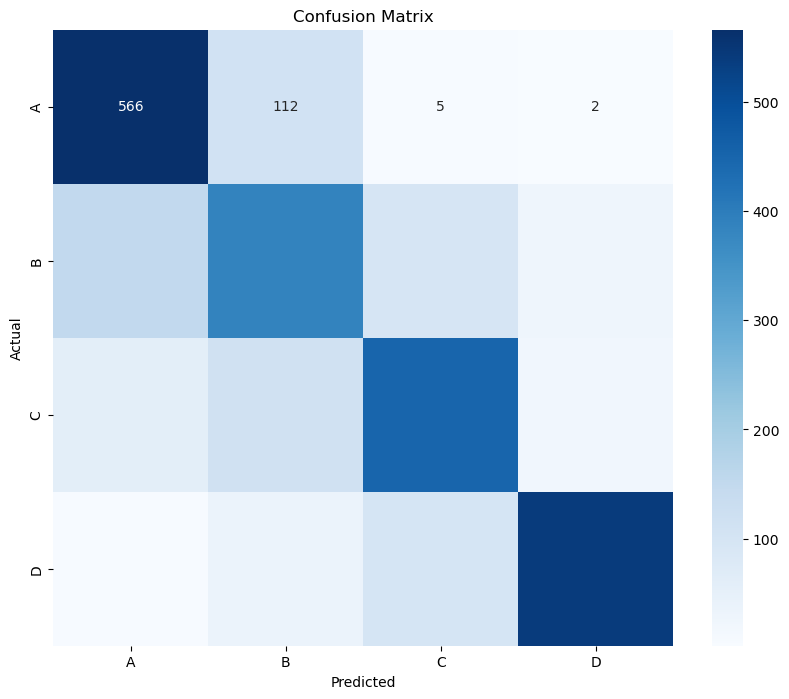


Feature Importance:
                    feature  importance
8   sit and bend forward_cm    0.370739
9            sit-ups counts    0.150593
4                body fat_%    0.081543
11                      bmi    0.070901
0                       age    0.064677
3                 weight_kg    0.059498
7                 gripForce    0.057555
10            broad jump_cm    0.055698
2                 height_cm    0.032872
6                  systolic    0.020765
5                 diastolic    0.017852
1               gender_code    0.017308


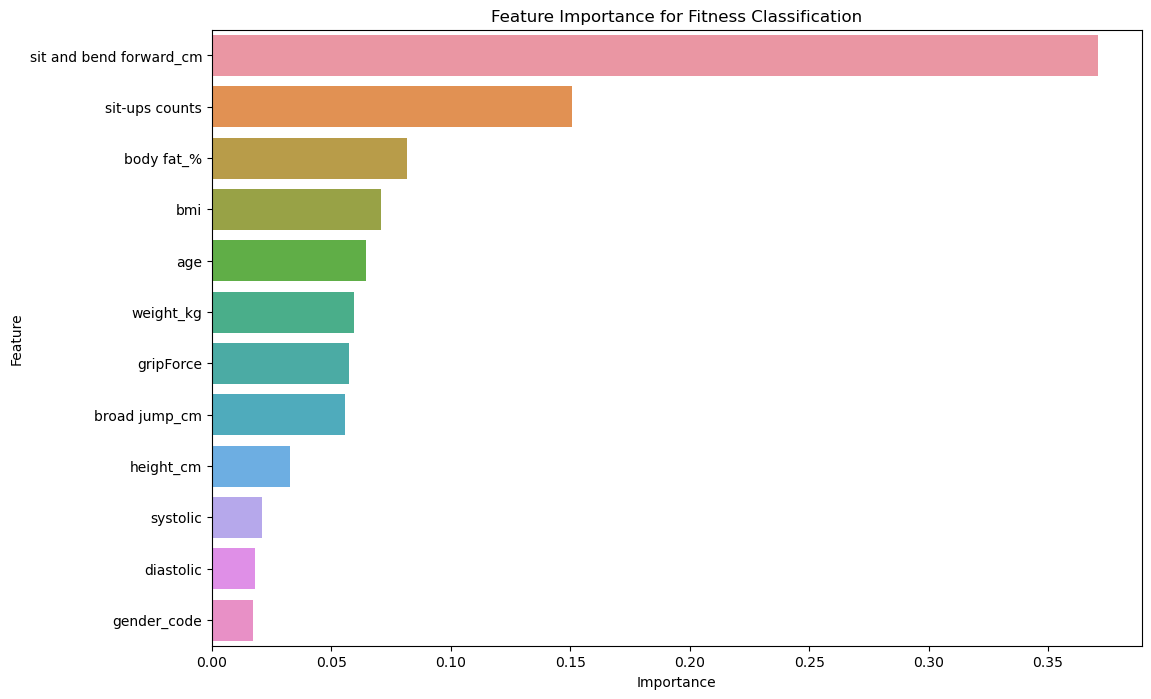

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def build_fitness_classifier(data):
    """Build a fitness level classification model"""
    # Select features for classification
    features = [
        'age', 'gender_code', 'height_cm', 'weight_kg', 'body fat_%',
        'diastolic', 'systolic', 'gripForce',
        'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm', 'bmi'
    ]

    # Prepare features and target
    X = data[features]
    y = data['class']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print(f"Training accuracy: {train_accuracy:.4f}")
    print(f"Testing accuracy: {test_accuracy:.4f}")

    # Generate detailed evaluation
    y_pred = model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Show confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Calculate feature importance
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\nFeature Importance:")
    print(feature_importance)

    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Feature Importance for Fitness Classification')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

    return model, feature_importance

# Build the fitness classifier
fitness_classifier, feature_importance = build_fitness_classifier(processed_body_performance)


## Classifying a User's Fitness Level

In [ ]:
def classify_user(model, user_data, scaler=None):
    """Classify a user's fitness level"""
    # Create a DataFrame from user data
    user_df = pd.DataFrame([user_data])

    # Calculate BMI
    if 'height_cm' in user_df and 'weight_kg' in user_df:
        user_df['bmi'] = user_df['weight_kg'] / ((user_df['height_cm'] / 100) ** 2)

    # Convert gender to code
    if 'gender' in user_df:
        user_df['gender_code'] = user_df['gender'].map({'M': 1, 'F': 0})

    # Select features used by the model
    features = [
        'age', 'gender_code', 'height_cm', 'weight_kg', 'body fat_%',
        'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm',
        'sit-ups counts', 'broad jump_cm', 'bmi'
    ]

    # Ensure all features are present
    for feature in features:
        if feature not in user_df:
            user_df[feature] = 0  # Default value

    # Scale features if a scaler is provided
    user_features = user_df[features]
    if scaler is not None:
        user_features = scaler.transform(user_features)

    # Predict fitness class (index of the highest probability)
    fitness_class = model.predict(user_features)[0]

    # Get the probability of each class
    class_probabilities = model.predict_proba(user_features)[0]

    # Find the class with the highest probability (use argmax in case fitness_class is not an integer)
    confidence = max(class_probabilities)

    # Get class labels from the model
    class_labels = model.classes_

    # If fitness_class is not an integer, use argmax to find the index of the highest probability
    fitness_class_index = class_probabilities.argmax()  # Find the index of the class with the highest probability
    interpretation = f"User is classified as: {class_labels[fitness_class_index]}"

    return {
        'fitness_class': class_labels[fitness_class_index],
        'confidence': confidence,
        'interpretation': interpretation,
        'class_probabilities': dict(zip(class_labels, class_probabilities))
    }


In [ ]:
# def classify_user(model, user_data, scaler=None):
#     """Classify a user's fitness level"""
#     # Create a DataFrame from user data
#     user_df = pd.DataFrame([user_data])

#     # Calculate BMI
#     if 'height_cm' in user_df and 'weight_kg' in user_df:
#         user_df['bmi'] = user_df['weight_kg'] / ((user_df['height_cm'] / 100) ** 2)

#     # Convert gender to code
#     if 'gender' in user_df:
#         user_df['gender_code'] = user_df['gender'].map({'M': 1, 'F': 0})

#     # Select features used by the model
#     features = [
#         'age', 'gender_code', 'height_cm', 'weight_kg', 'body fat_%',
#         'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm',
#         'sit-ups counts', 'broad jump_cm', 'bmi'
#     ]

#     # Ensure all features are present
#     for feature in features:
#         if feature not in user_df:
#             user_df[feature] = 0  # Default value

#     # Scale features if a scaler is provided
#     user_features = user_df[features]
#     if scaler is not None:
#         user_features = scaler.transform(user_features)

#     # Predict fitness class
#     fitness_class = model.predict(user_features)[0]

#     # Get the probability of each class
#     class_probabilities = model.predict_proba(user_features)[0]

#     # Find the class with the highest probability
#     confidence = max(class_probabilities)

#     # Provide interpretation based on class
#     class_labels = model.classes_
#     interpretation = f"User is classified as: {class_labels[fitness_class]}"

#     return {
#         'fitness_class': class_labels[fitness_class],
#         'confidence': confidence,
#         'interpretation': interpretation,
#         'class_probabilities': dict(zip(class_labels, class_probabilities))
#     }


In [ ]:
# Test the classifier with a sample user
sample_user = {
    'age': 35,
    'gender': 'M',
    'height_cm': 180,
    'weight_kg': 80,
    'body fat_%': 18,
    'diastolic': 75,
    'systolic': 120,
    'gripForce': 45,
    'sit and bend forward_cm': 25,
    'sit-ups counts': 30,
    'broad jump_cm': 200
}

# Classify the sample user
classification_result = classify_user(fitness_classifier, sample_user)

# Print the results
print(f"Fitness Class: {classification_result['fitness_class']}")
print(f"Confidence: {classification_result['confidence']:.2f}")
print(f"Interpretation: {classification_result['interpretation']}")
print(f"Class Probabilities: {classification_result['class_probabilities']}")


Fitness Class: A
Confidence: 0.40
Interpretation: User is classified as: A
Class Probabilities: {'A': 0.40188459374499025, 'B': 0.26479130809947693, 'C': 0.053939375120796475, 'D': 0.2793847230347364}


<!-- Fitness Class: The user has been classified as A, which indicates the fitness level according to this model.

Confidence: The confidence in this classification is 0.40 (40%). This means the model is relatively unsure, and it’s not a very strong prediction.

Interpretation: The interpretation says "User is classified as: A" based on the model's prediction.

Class Probabilities: This shows the probabilities for each fitness class (A, B, C, D). The model is most confident about class A (40%), but it also has notable probabilities for classes B (26%) and D (27%).

Suggestions:
Low Confidence: The confidence is only 40%, which suggests that the model is not very sure about this classification. You might want to tune the model (e.g., adjusting hyperparameters or using a different classifier) to get more certainty in predictions.

Feature Importance: You can look at the feature importance from the RandomForest model to understand which features are contributing the most to the prediction. This can help refine your model and maybe improve its performance.

Probabilities: You could consider thresholds for deciding which class a user should belong to, depending on the level of confidence required. For example, you could set a threshold (e.g., 60%) to classify a user only if the confidence is high enough. -->

In [ ]:
def test_classifier_with_samples(model):
    """Test the classifier with different sample users"""
    # Create a list of sample users with different profiles
    sample_users = [
        {
            'profile': 'Elite Athlete',
            'data': {
                'age': 28,
                'gender': 'M',
                'height_cm': 185,
                'weight_kg': 80,
                'body fat_%': 8,
                'diastolic': 70,
                'systolic': 120,
                'gripForce': 60,
                'sit and bend forward_cm': 30,
                'sit-ups counts': 60,
                'broad jump_cm': 250
            }
        },
        {
            'profile': 'Regular Gym-goer',
            'data': {
                'age': 35,
                'gender': 'F',
                'height_cm': 165,
                'weight_kg': 60,
                'body fat_%': 22,
                'diastolic': 75,
                'systolic': 125,
                'gripForce': 30,
                'sit and bend forward_cm': 25,
                'sit-ups counts': 25,
                'broad jump_cm': 160
            }
        },
        {
            'profile': 'Beginner',
            'data': {
                'age': 45,
                'gender': 'M',
                'height_cm': 175,
                'weight_kg': 95,
                'body fat_%': 28,
                'diastolic': 85,
                'systolic': 135,
                'gripForce': 35,
                'sit and bend forward_cm': 15,
                'sit-ups counts': 15,
                'broad jump_cm': 140
            }
        }
    ]

    # Classify each sample user
    for sample in sample_users:
        result = classify_user(model, sample['data'])
        print(f"\nProfile: {sample['profile']}")
        print(f"Fitness Class: {result['fitness_class']}")
        print(f"Confidence: {result['confidence']:.2f}")
        print(f"Interpretation: {result['interpretation']}")
        print(f"Class Probabilities: {result['class_probabilities']}")


In [ ]:
# Test with different sample users
test_classifier_with_samples(fitness_classifier)



Profile: Elite Athlete
Fitness Class: A
Confidence: 0.40
Interpretation: User is classified as: A
Class Probabilities: {'A': 0.40188459374499025, 'B': 0.26479130809947693, 'C': 0.053939375120796475, 'D': 0.2793847230347364}

Profile: Regular Gym-goer
Fitness Class: A
Confidence: 0.40
Interpretation: User is classified as: A
Class Probabilities: {'A': 0.39632789415655856, 'B': 0.28083601970730515, 'C': 0.050115831313317295, 'D': 0.27272025482281903}

Profile: Beginner
Fitness Class: A
Confidence: 0.40
Interpretation: User is classified as: A
Class Probabilities: {'A': 0.40188459374499025, 'B': 0.26479130809947693, 'C': 0.053939375120796475, 'D': 0.2793847230347364}


# *4. Exercise Recommendation Engine*

build a recommendation system for exercises based on user profile and fitness level


In [ ]:
def create_exercise_features(exercise_data):
    """Create feature encodings for exercises"""
    # One-hot encode categorical features
    categorical_features = ['Type', 'BodyPart', 'Equipment', 'Level']

    # For each feature, create a one-hot encoding
    encodings = {}
    for feature in categorical_features:
        # Get unique values for this feature
        unique_values = exercise_data[feature].unique()

        # Create one-hot encoding
        encoding = {}
        for i, value in enumerate(unique_values):
            encoding[value] = i

        encodings[feature] = encoding

    # Convert categorical features to numerical using the encodings
    encoded_data = exercise_data.copy()
    for feature, encoding in encodings.items():
        encoded_data[f"{feature}_encoded"] = encoded_data[feature].map(encoding)

    return encoded_data, encodings


In [ ]:
def recommend_exercises(exercise_data, user_profile, fitness_class, n=10):
    """Generate exercise recommendations for a user"""
    # Extract user goals and preferences
    goals = user_profile.get('fitness_goals', 'general')
    experience = user_profile.get('experience_level', 'intermediate')
    available_equipment = user_profile.get('available_equipment', [])
    target_body_parts = user_profile.get('target_body_parts', [])

    # Filter exercises by user constraints
    filtered_exercises = exercise_data.copy()

    # Filter by equipment if specified
    if available_equipment and isinstance(available_equipment, list) and len(available_equipment) > 0:
        filtered_exercises = filtered_exercises[
            filtered_exercises['Equipment'].isin(available_equipment)
        ]

    # Filter by target body parts if specified
    if target_body_parts and isinstance(target_body_parts, list) and len(target_body_parts) > 0:
        filtered_exercises = filtered_exercises[
            filtered_exercises['BodyPart'].isin(target_body_parts)
        ]

    # Filter by appropriate difficulty based on fitness class
    level_mapping = {
        'A': 'Expert',
        'B': 'Intermediate to Expert',
        'C': 'Intermediate',
        'D': 'Beginner to Intermediate'
    }

    if fitness_class in level_mapping:
        if level_mapping[fitness_class] == 'Expert':
            pass  # Expert users can do all exercises
        elif level_mapping[fitness_class] == 'Intermediate to Expert':
            filtered_exercises = filtered_exercises[
                filtered_exercises['Level'] != 'Expert'
            ]
        elif level_mapping[fitness_class] == 'Intermediate':
            filtered_exercises = filtered_exercises[
                filtered_exercises['Level'] != 'Expert'
            ]
        else:
            filtered_exercises = filtered_exercises[
                filtered_exercises['Level'] == 'Beginner'
            ]

    # Implement goal-based exercise selection logic
    goal_type_mapping = {
        'strength': ['Strength', 'Powerlifting'],
        'hypertrophy': ['Strength'],
        'weight_loss': ['Cardio', 'Plyometrics'],
        'endurance': ['Cardio', 'Stretching'],
        'flexibility': ['Stretching'],
        'general': ['Strength', 'Cardio', 'Stretching']
    }

    if goals in goal_type_mapping:
        recommended_types = goal_type_mapping[goals]
        type_filtered = filtered_exercises[
            filtered_exercises['Type'].isin(recommended_types)
        ]
        if len(type_filtered) >= n:
            filtered_exercises = type_filtered

    # Relax constraints if there are not enough exercises after filtering
    if len(filtered_exercises) < n:
        filtered_exercises = exercise_data[
            (exercise_data['Level'] != 'Expert') if fitness_class != 'A' else True
        ]

    # If still too few, use all exercises
    if len(filtered_exercises) < n:
        filtered_exercises = exercise_data

    # Initialize the score column with scalar value 0
    filtered_exercises['score'] = 0.0  # Ensure the score column is initialized to float

    # Scoring based on exercise type matching goals
    if goals in goal_type_mapping:
        for exercise_type in goal_type_mapping[goals]:
            filtered_exercises.loc[
                filtered_exercises['Type'] == exercise_type, 'score'
            ] += 1

    # Score based on appropriate difficulty level
    if fitness_class in ['A', 'B']:
        filtered_exercises.loc[filtered_exercises['Level'] == 'Expert', 'score'] += 0.5
    elif fitness_class in ['B', 'C']:
        filtered_exercises.loc[filtered_exercises['Level'] == 'Intermediate', 'score'] += 0.5
    else:
        filtered_exercises.loc[filtered_exercises['Level'] == 'Beginner', 'score'] += 0.5

    # Bonus score for equipment availability
    if available_equipment and isinstance(available_equipment, list) and len(available_equipment) > 0:
        filtered_exercises.loc[
            filtered_exercises['Equipment'].isin(available_equipment), 'score'
        ] += 0.3

    # Bonus score for target body parts
    if target_body_parts and isinstance(target_body_parts, list) and len(target_body_parts) > 0:
        filtered_exercises.loc[
            filtered_exercises['BodyPart'].isin(target_body_parts), 'score'
        ] += 0.5

    # Sort by score and take top N
    recommendations = filtered_exercises.sort_values('score', ascending=False).head(n)

    # Prepare recommendation results with explanations
    recommendation_list = []
    for _, exercise in recommendations.iterrows():
        explanation = []

        # Add explanations based on scoring factors
        if goals in goal_type_mapping and exercise['Type'] in goal_type_mapping[goals]:
            explanation.append(f"Matches your {goals} goal")

        if exercise['Level'] == level_mapping.get(fitness_class, '').split(' to ')[0]:
            explanation.append(f"Appropriate for your fitness level")

        if available_equipment and isinstance(available_equipment, list):
            if exercise['Equipment'] in available_equipment:
                explanation.append(f"Uses your available equipment ({exercise['Equipment']})")

        if target_body_parts and isinstance(target_body_parts, list):
            if exercise['BodyPart'] in target_body_parts:
                explanation.append(f"Targets your preferred body part ({exercise['BodyPart']})")

        recommendation_list.append({
            'id': exercise.get('ID', None),
            'title': exercise['Title'],
            'type': exercise['Type'],
            'body_part': exercise['BodyPart'],
            'equipment': exercise['Equipment'],
            'level': exercise['Level'],
            'description': exercise['Desc'],
            'score': exercise['score'],
            'explanation': " • ".join(explanation)
        })

    return recommendation_list


In [ ]:
# Prepare exercise data for recommendations
processed_gym_data, exercise_encodings = create_exercise_features(gym_dataset)


In [ ]:
# Test the recommendation engine with a sample user
sample_user_for_recs = {
    'fitness_goals': 'strength',
    'experience_level': 'intermediate',
    'available_equipment': ['Barbell', 'Dumbbell', 'Machine'],
    'target_body_parts': ['Chest', 'Back', 'Legs']
}


In [ ]:
recommendations = recommend_exercises(
    processed_gym_data,
    sample_user_for_recs,
    fitness_class='B',
    n=5
)

# Print recommendations
print("\nRecommended Exercises:")
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec['title']} - {rec['type']} - {rec['body_part']}")
    print(f"   Equipment: {rec['equipment']}, Level: {rec['level']}")
    print(f"   Why: {rec['explanation']}")
    print()



Recommended Exercises:
1. Close-grip bench press - Strength - Chest
   Equipment: Barbell, Level: Intermediate
   Why: Matches your strength goal • Appropriate for your fitness level • Uses your available equipment (Barbell) • Targets your preferred body part (Chest)

2. Bent-arm dumbbell pull-over - Strength - Chest
   Equipment: Dumbbell, Level: Intermediate
   Why: Matches your strength goal • Appropriate for your fitness level • Uses your available equipment (Dumbbell) • Targets your preferred body part (Chest)

3. Incline Dumbbell Fly - Gethin Variation - Strength - Chest
   Equipment: Dumbbell, Level: Intermediate
   Why: Matches your strength goal • Appropriate for your fitness level • Uses your available equipment (Dumbbell) • Targets your preferred body part (Chest)

4. TBS Dumbbell Incline Press - Strength - Chest
   Equipment: Dumbbell, Level: Intermediate
   Why: Matches your strength goal • Appropriate for your fitness level • Uses your available equipment (Dumbbell) • Ta

# Workou plan generator

In [ ]:
import random


In [ ]:
def create_workout_plan(user_profile, recommended_exercises, fitness_class):
    """Generate a complete workout plan"""

    # 1. Determine training split based on user profile
    training_split = select_training_split(user_profile, fitness_class)

    # 2. Get training parameters based on goal
    goal = user_profile.get('fitness_goals', 'general_fitness')
    training_params = get_training_parameters(goal, fitness_class)

    # 3. Determine session frequency
    available_time = user_profile.get('available_time', 3)  # sessions per week

    # 4. Generate the workout structure
    workout_plan = {
        'name': f"{goal.capitalize()} {training_split.replace('_', '-')} Plan",
        'description': f"A {training_split.replace('_', ' ')} workout plan focused on {goal}, "
                      f"designed for a fitness level {fitness_class} individual.",
        'training_split': training_split,
        'sessions_per_week': available_time,
        'goal': goal,
        'duration_weeks': 4,  # Default to 4-week plan
        'progression_model': training_params['progression'],
        'sessions': [],
        'parameters': training_params
    }

    # 5. Create sessions based on the training split
    if training_split == 'full_body':
        workout_plan['sessions'] = create_full_body_sessions(
            recommended_exercises, available_time, training_params
        )
    elif training_split == 'upper_lower':
        workout_plan['sessions'] = create_upper_lower_sessions(
            recommended_exercises, available_time, training_params
        )
    elif training_split == 'push_pull_legs':
        workout_plan['sessions'] = create_push_pull_legs_sessions(
            recommended_exercises, available_time, training_params
        )

    # 6. Create weekly schedule
    workout_plan['weekly_schedule'] = create_weekly_schedule(workout_plan['sessions'])

    # 7. Add progression plan
    workout_plan['progression'] = create_progression_plan(
        workout_plan, training_params['progression']
    )

    return workout_plan


In [ ]:
def select_training_split(user_profile, fitness_class):
    """Select appropriate training split based on user profile and fitness level"""

    # Extract relevant information
    goal = user_profile.get('fitness_goals', 'general_fitness')
    experience = user_profile.get('experience_level', 'beginner')
    time_available = user_profile.get('available_time', 3)  # sessions per week

    # Rule-based selection
    if fitness_class == 'D' or experience == 'beginner':
        return 'full_body'

    if fitness_class == 'C' or experience == 'intermediate':
        if time_available <= 3:
            return 'full_body'
        else:
            return 'upper_lower'

    if goal == 'hypertrophy':
        if time_available >= 5:
            return 'push_pull_legs'
        else:
            return 'upper_lower'

    if goal == 'strength':
        if time_available >= 4:
            return 'upper_lower'
        else:
            return 'full_body'

    if fitness_class == 'A' and experience == 'advanced':
        if time_available >= 5:
            return 'push_pull_legs'
        else:
            return 'upper_lower'

    # Default case
    return 'full_body'


In [ ]:
def get_training_parameters(goal, fitness_class):
    """Get training parameters based on goal and fitness level"""

    # Training parameters by goal
    training_parameters = {
        'strength': {
            'intensity': 'high',
            'rep_range': [1, 5],
            'sets': [3, 5],
            'rest_period': [180, 300],  # seconds
            'tempo': 'controlled',
            'progression': 'linear_weight',
            'exercise_priority': 'compound'
        },
        'hypertrophy': {
            'intensity': 'moderate to high',
            'rep_range': [8, 12],
            'sets': [3, 4],
            'rest_period': [60, 120],  # seconds
            'tempo': 'controlled',
            'progression': 'double_progression',
            'exercise_priority': 'mix'
        },
        'weight_loss': {
            'intensity': 'moderate',
            'rep_range': [10, 15],
            'sets': [3, 4],
            'rest_period': [30, 60],  # seconds
            'tempo': 'fast',
            'progression': 'circuit_based',
            'exercise_priority': 'compound'
        },
        'endurance': {
            'intensity': 'low to moderate',
            'rep_range': [15, 20],
            'sets': [2, 3],
            'rest_period': [30, 60],  # seconds
            'tempo': 'moderate',
            'progression': 'volume_based',
            'exercise_priority': 'mix'
        },
        'general_fitness': {
            'intensity': 'moderate',
            'rep_range': [8, 15],
            'sets': [2, 3],
            'rest_period': [60, 90],  # seconds
            'tempo': 'moderate',
            'progression': 'mixed',
            'exercise_priority': 'mix'
        }
    }

    # Fitness level adaptations
    fitness_level_adaptations = {
        'A': {  # Elite
            'volume_modifier': 1.2,
            'intensity_modifier': 1.2,
            'exercise_complexity': 'high',
            'rest_period_modifier': 0.8,
            'progression_speed': 'fast'
        },
        'B': {  # Advanced
            'volume_modifier': 1.1,
            'intensity_modifier': 1.1,
            'exercise_complexity': 'high',
            'rest_period_modifier': 0.9,
            'progression_speed': 'moderate'
        },
        'C': {  # Intermediate
            'volume_modifier': 1.0,
            'intensity_modifier': 1.0,
            'exercise_complexity': 'medium',
            'rest_period_modifier': 1.0,
            'progression_speed': 'moderate'
        },
        'D': {  # Beginner
            'volume_modifier': 0.8,
            'intensity_modifier': 0.8,
            'exercise_complexity': 'low',
            'rest_period_modifier': 1.2,
            'progression_speed': 'slow'
        }
    }

    # If goal isn't found, default to general fitness
    if goal not in training_parameters:
        goal = 'general_fitness'

    # Get base parameters
    parameters = training_parameters[goal].copy()

    # Apply fitness level adaptations
    level_adaptations = fitness_level_adaptations.get(
        fitness_class, fitness_level_adaptations['C']
    )

    # Adjust parameters based on fitness level
    adjusted_parameters = parameters.copy()

    # Adjust rep range based on intensity modifier
    intensity_mod = level_adaptations['intensity_modifier']
    if intensity_mod < 1.0:
        adjusted_parameters['rep_range'] = [
            int(parameters['rep_range'][0] * 1.2),
            int(parameters['rep_range'][1] * 1.1)
        ]
    elif intensity_mod > 1.0:
        adjusted_parameters['rep_range'] = [
            max(1, int(parameters['rep_range'][0] * 0.9)),
            int(parameters['rep_range'][1] * 0.9)
        ]

    # Adjust volume (sets)
    volume_mod = level_adaptations['volume_modifier']
    adjusted_parameters['sets'] = [
        max(1, int(parameters['sets'][0] * volume_mod)),
        max(2, int(parameters['sets'][1] * volume_mod))
    ]

    # Adjust rest periods
    rest_mod = level_adaptations['rest_period_modifier']
    adjusted_parameters['rest_period'] = [
        max(30, int(parameters['rest_period'][0] * rest_mod)),
        max(45, int(parameters['rest_period'][1] * rest_mod))
    ]

    return adjusted_parameters


In [ ]:
def create_full_body_sessions(recommended_exercises, sessions_per_week, params):
    """Create full body workout sessions"""
    sessions = []

    # Group exercises by body part
    body_parts = ['Chest', 'Back', 'Legs', 'Shoulders', 'Biceps', 'Triceps', 'Abdominals']
    exercises_by_part = {}

    for part in body_parts:
        # Find exercises for this body part from recommendations
        part_exercises = [e for e in recommended_exercises if e['body_part'] == part]
        exercises_by_part[part] = part_exercises

    # Create the full body sessions
    for i in range(sessions_per_week):
        session = {
            'name': f"Full Body Workout {chr(65+i)}",  # A, B, C, etc.
            'focus': 'Full Body',
            'exercises': []
        }

        # Select exercises for each body part
        for part in body_parts:
            if part in exercises_by_part and exercises_by_part[part]:
                # Get 1 exercise per body part, alternating between sessions
                part_exercises = exercises_by_part[part]

                # Select different exercises for each session if possible
                exercise_idx = i % len(part_exercises) if len(part_exercises) > 0 else 0
                if exercise_idx < len(part_exercises):
                    exercise = part_exercises[exercise_idx]

                    # Add to session with training parameters
                    session['exercises'].append({
                        'exercise': exercise,
                        'sets': random.randint(params['sets'][0], params['sets'][1]),
                        'reps': random.randint(params['rep_range'][0], params['rep_range'][1]),
                        'rest': random.randint(params['rest_period'][0], params['rest_period'][1]),
                        'order': len(session['exercises']) + 1
                    })

        # Sort exercises (compound first)
        session['exercises'] = sorted(
            session['exercises'],
            key=lambda x: 0 if x['exercise']['type'] == 'Strength' else 1
        )

        sessions.append(session)

    return sessions


In [ ]:
def create_upper_lower_sessions(recommended_exercises, sessions_per_week, params):
    """Create upper/lower split workout sessions"""
    sessions = []

    # Group exercises by body part
    upper_parts = ['Chest', 'Back', 'Shoulders', 'Biceps', 'Triceps', 'Forearms']
    lower_parts = ['Legs', 'Abdominals']

    # Group exercises
    upper_exercises = [e for e in recommended_exercises if e['body_part'] in upper_parts]
    lower_exercises = [e for e in recommended_exercises if e['body_part'] in lower_parts]

    # Create sessions
    upper_count = sessions_per_week // 2
    lower_count = sessions_per_week - upper_count

    # Create upper body sessions
    for i in range(upper_count):
        session = {
            'name': f"Upper Body Workout {chr(65+i)}",
            'focus': 'Upper Body',
            'exercises': []
        }

        # Select exercises for upper body, with some randomization
        exercises_per_session = 5
        selected_upper = random.sample(
            upper_exercises,
            min(exercises_per_session, len(upper_exercises))
        ) if upper_exercises else []

        for ex in selected_upper:
            session['exercises'].append({
                'exercise': ex,
                'sets': random.randint(params['sets'][0], params['sets'][1]),
                'reps': random.randint(params['rep_range'][0], params['rep_range'][1]),
                'rest': random.randint(params['rest_period'][0], params['rest_period'][1]),
                'order': len(session['exercises']) + 1
            })

        # Sort exercises (compound first)
        session['exercises'] = sorted(
            session['exercises'],
            key=lambda x: 0 if x['exercise']['type'] == 'Strength' else 1
        )

        sessions.append(session)

    # Create lower body sessions
    for i in range(lower_count):
        session = {
            'name': f"Lower Body Workout {chr(65+i)}",
            'focus': 'Lower Body',
            'exercises': []
        }

        # Select exercises for lower body, with some randomization
        exercises_per_session = 5
        selected_lower = random.sample(
            lower_exercises,
            min(exercises_per_session, len(lower_exercises))
        ) if lower_exercises else []

        for ex in selected_lower:
            session['exercises'].append({
                'exercise': ex,
                'sets': random.randint(params['sets'][0], params['sets'][1]),
                'reps': random.randint(params['rep_range'][0], params['rep_range'][1]),
                'rest': random.randint(params['rest_period'][0], params['rest_period'][1]),
                'order': len(session['exercises']) + 1
            })

        # Sort exercises (compound first)
        session['exercises'] = sorted(
            session['exercises'],
            key=lambda x: 0 if x['exercise']['type'] == 'Strength' else 1
        )

        sessions.append(session)

    return sessions


In [ ]:
def create_push_pull_legs_sessions(recommended_exercises, sessions_per_week, params):
    """Create push/pull/legs split workout sessions"""
    sessions = []

    # Map to the actual body parts in the dataset
    push_parts = ['Chest', 'Shoulders', 'Triceps']
    pull_parts = ['Back', 'Biceps', 'Forearms']
    legs_parts = ['Legs', 'Abdominals']

    # Group exercises
    push_exercises = [e for e in recommended_exercises if e['body_part'] in push_parts]
    pull_exercises = [e for e in recommended_exercises if e['body_part'] in pull_parts]
    legs_exercises = [e for e in recommended_exercises if e['body_part'] in legs_parts]

    # Determine rotation pattern
    if sessions_per_week == 3:
        rotation = ['push', 'pull', 'legs']
    elif sessions_per_week == 6:
        rotation = ['push', 'pull', 'legs', 'push', 'pull', 'legs']
    else:
        # Create a custom rotation
        rotation = []
        patterns = ['push', 'pull', 'legs']
        for i in range(sessions_per_week):
            rotation.append(patterns[i % 3])

    # Create sessions based on rotation
    for i, focus in enumerate(rotation):
        session = {
            'name': f"{focus.capitalize()} Workout {chr(65 + (i % 2))}",
            'focus': focus.capitalize(),
            'exercises': []
        }

        # Select exercises based on focus
        if focus == 'push':
            target_exercises = push_exercises
        elif focus == 'pull':
            target_exercises = pull_exercises
        else:  # legs
            target_exercises = legs_exercises

        # Determine number of exercises
        exercises_per_session = 5

        # Select exercises with some randomization
        if target_exercises:
            selected = random.sample(
                target_exercises,
                min(exercises_per_session, len(target_exercises))
            )

            for ex in selected:
                session['exercises'].append({
                    'exercise': ex,
                    'sets': random.randint(params['sets'][0], params['sets'][1]),
                    'reps': random.randint(params['rep_range'][0], params['rep_range'][1]),
                    'rest': random.randint(params['rest_period'][0], params['rest_period'][1]),
                    'order': len(session['exercises']) + 1
                })

        # Sort exercises (compound first)
        session['exercises'] = sorted(
            session['exercises'],
            key=lambda x: 0 if x['exercise']['type'] == 'Strength' else 1
        )

        sessions.append(session)

    return sessions


In [ ]:
def create_push_pull_legs_sessions(recommended_exercises, sessions_per_week, params):
    """Create push/pull/legs split workout sessions"""
    sessions = []

    # Map to the actual body parts in the dataset
    push_parts = ['Chest', 'Shoulders', 'Triceps']
    pull_parts = ['Back', 'Biceps', 'Forearms']
    legs_parts = ['Legs', 'Abdominals']

    # Group exercises
    push_exercises = [e for e in recommended_exercises if e['body_part'] in push_parts]
    pull_exercises = [e for e in recommended_exercises if e['body_part'] in pull_parts]
    legs_exercises = [e for e in recommended_exercises if e['body_part'] in legs_parts]

    # Determine rotation pattern
    if sessions_per_week == 3:
        rotation = ['push', 'pull', 'legs']
    elif sessions_per_week == 6:
        rotation = ['push', 'pull', 'legs', 'push', 'pull', 'legs']
    else:
        # Create a custom rotation
        rotation = []
        patterns = ['push', 'pull', 'legs']
        for i in range(sessions_per_week):
            rotation.append(patterns[i % 3])

    # Create sessions based on rotation
    for i, focus in enumerate(rotation):
        session = {
            'name': f"{focus.capitalize()} Workout {chr(65 + (i % 2))}",
            'focus': focus.capitalize(),
            'exercises': []
        }

        # Select exercises based on focus
        if focus == 'push':
            target_exercises = push_exercises
        elif focus == 'pull':
            target_exercises = pull_exercises
        else:  # legs
            target_exercises = legs_exercises

        # Determine number of exercises
        exercises_per_session = 5

        # Select exercises with some randomization
        if target_exercises:
            selected = random.sample(
                target_exercises,
                min(exercises_per_session, len(target_exercises))
            )

            for ex in selected:
                session['exercises'].append({
                    'exercise': ex,
                    'sets': random.randint(params['sets'][0], params['sets'][1]),
                    'reps': random.randint(params['rep_range'][0], params['rep_range'][1]),
                    'rest': random.randint(params['rest_period'][0], params['rest_period'][1]),
                    'order': len(session['exercises']) + 1
                })

        # Sort exercises (compound first)
        session['exercises'] = sorted(
            session['exercises'],
            key=lambda x: 0 if x['exercise']['type'] == 'Strength' else 1
        )

        sessions.append(session)

    return sessions


In [ ]:
def create_weekly_schedule(sessions):
    """Create a suggested weekly schedule for the workout plan"""
    # Define days of the week
    days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Number of workout sessions the user has
    num_sessions = len(sessions)

    # Logic to decide training days based on the number of sessions
    if num_sessions <= 3:
        # Space out for recovery: Mon, Wed, Fri
        training_days = ['Monday', 'Wednesday', 'Friday'][:num_sessions]
    elif num_sessions == 4:
        # Mon, Tue, Thu, Fri or similar
        training_days = ['Monday', 'Tuesday', 'Thursday', 'Friday']
    elif num_sessions == 5:
        # Mon through Fri
        training_days = days_of_week[:5]
    else:
        # 6 sessions: Mon through Sat
        training_days = days_of_week[:6]

    # Create the workout schedule
    schedule = []
    for i, day in enumerate(days_of_week):
        if day in training_days:
            session_idx = training_days.index(day)
            if session_idx < len(sessions):
                schedule.append({
                    'day': day,
                    'workout': sessions[session_idx]['name'],
                    'focus': sessions[session_idx]['focus'],
                    'is_rest_day': False
                })
            else:
                schedule.append({
                    'day': day,
                    'workout': 'Rest Day',
                    'focus': 'Recovery',
                    'is_rest_day': True
                })
        else:
            schedule.append({
                'day': day,
                'workout': 'Rest Day',
                'focus': 'Recovery',
                'is_rest_day': True
            })

    return schedule


In [ ]:
def create_progression_plan(workout_plan, progression_type):
    """Create a progression plan for the workout"""
    progression = []

    # Create weekly progression based on the model
    if progression_type == 'linear_weight':
        progression = [
            {'week': 1, 'adjustment': 'Baseline weights', 'focus': 'Form and technique'},
            {'week': 2, 'adjustment': 'Increase weight by 5% if all reps completed', 'focus': 'Progressive overload'},
            {'week': 3, 'adjustment': 'Increase weight by another 5% if all reps completed', 'focus': 'Strength building'},
            {'week': 4, 'adjustment': 'Deload - reduce weights by 10% from week 3', 'focus': 'Recovery and supercompensation'}
        ]
    elif progression_type == 'double_progression':
        progression = [
            {'week': 1, 'adjustment': 'Start at lower end of rep range', 'focus': 'Form and technique'},
            {'week': 2, 'adjustment': 'Increase reps by 1-2 per set if possible', 'focus': 'Volume building'},
            {'week': 3, 'adjustment': 'If upper rep range reached, increase weight by 5% and drop to lower rep range', 'focus': 'Progressive overload'},
            {'week': 4, 'adjustment': 'Continue with new weights, aim for middle of rep range', 'focus': 'Consolidation'}
        ]
    elif progression_type == 'volume_based':
        progression = [
            {'week': 1, 'adjustment': 'Baseline volume', 'focus': 'Establishing base fitness'},
            {'week': 2, 'adjustment': 'Add 1 set to each exercise', 'focus': 'Volume building'},
            {'week': 3, 'adjustment': 'Maintain sets, increase reps by 2 per set', 'focus': 'Endurance development'},
            {'week': 4, 'adjustment': 'Reduce volume by 30%, increase intensity slightly', 'focus': 'Active recovery'}
        ]
    else:  # Default progression
        progression = [
            {'week': 1, 'adjustment': 'Baseline training', 'focus': 'Adaptation'},
            {'week': 2, 'adjustment': 'Slight increase in intensity', 'focus': 'Progressive overload'},
            {'week': 3, 'adjustment': 'Peak intensity week', 'focus': 'Challenge phase'},
            {'week': 4, 'adjustment': 'Deload week', 'focus': 'Recovery'}
        ]

    return progression


In [ ]:
# Test the workout plan generator
workout_plan = create_workout_plan(
    sample_user_for_recs,
    recommendations,
    'B'
)

# Print plan overview
print(f"Generated Workout Plan: {workout_plan['name']}")
print(f"Training Split: {workout_plan['training_split']}")
print(f"Sessions per Week: {workout_plan['sessions_per_week']}")

print("\nWeekly Schedule:")
for day in workout_plan['weekly_schedule']:
    print(f"{day['day']}: {day['workout']}")

print("\nProgression Plan:")
for week in workout_plan['progression']:
    print(f"Week {week['week']}: {week['adjustment']} - Focus: {week['focus']}")

print("\nWorkout Sessions:")
for session in workout_plan['sessions']:
    print(f"\n{session['name']} - {session['focus']}")
    print("Exercises:")
    for exercise in session.get('exercises', []):
        ex = exercise['exercise']
        print(f"  - {ex['title']} ({ex['body_part']}): {exercise['sets']} sets × {exercise['reps']} reps, {exercise['rest']}s rest")


Generated Workout Plan: Strength full-body Plan
Training Split: full_body
Sessions per Week: 3

Weekly Schedule:
Monday: Full Body Workout A
Tuesday: Rest Day
Wednesday: Full Body Workout B
Thursday: Rest Day
Friday: Full Body Workout C
Saturday: Rest Day
Sunday: Rest Day

Progression Plan:
Week 1: Baseline weights - Focus: Form and technique
Week 2: Increase weight by 5% if all reps completed - Focus: Progressive overload
Week 3: Increase weight by another 5% if all reps completed - Focus: Strength building
Week 4: Deload - reduce weights by 10% from week 3 - Focus: Recovery and supercompensation

Workout Sessions:

Full Body Workout A - Full Body
Exercises:
  - Close-grip bench press (Chest): 3 sets × 4 reps, 266s rest

Full Body Workout B - Full Body
Exercises:
  - Bent-arm dumbbell pull-over (Chest): 5 sets × 2 reps, 217s rest

Full Body Workout C - Full Body
Exercises:
  - Incline Dumbbell Fly - Gethin Variation (Chest): 5 sets × 1 reps, 195s rest


# 6. Nutrition Plan Generator

In [ ]:

def calculate_tdee(user_profile):
    """Calculate Total Daily Energy Expenditure (TDEE)"""
    # Extract user data
    gender = user_profile.get('gender', 'M')
    age = user_profile.get('age', 30)
    weight_kg = user_profile.get('weight_kg', 70)
    height_cm = user_profile.get('height_cm', 170)
    activity_level = user_profile.get('activity_level', 'moderate')

    # Calculate Basal Metabolic Rate (BMR) using Mifflin-St Jeor Equation
    if gender.upper() == 'M':
        bmr = 10 * weight_kg + 6.25 * height_cm - 5 * age + 5
    else:
        bmr = 10 * weight_kg + 6.25 * height_cm - 5 * age - 161

    # Apply activity multiplier
    activity_multipliers = {
        'sedentary': 1.2,      # Little or no exercise
        'light': 1.375,        # Light exercise 1-3 days/week
        'moderate': 1.55,      # Moderate exercise 3-5 days/week
        'active': 1.725,       # Heavy exercise 6-7 days/week
        'very_active': 1.9     # Very heavy exercise, physical job or training 2x/day
    }

    multiplier = activity_multipliers.get(activity_level, 1.55)
    tdee = bmr * multiplier

    return round(tdee)

def calculate_macros(calories, goal, fitness_class):
    """Calculate macronutrient targets based on calories and goal"""
    # Macronutrient ratios by goal
    macro_ratios = {
        'weight_loss': {
            'protein': {'min': 0.30, 'target': 0.35, 'max': 0.40},
            'carbs': {'min': 0.20, 'target': 0.30, 'max': 0.40},
            'fat': {'min': 0.25, 'target': 0.35, 'max': 0.40}
        },
        'maintenance': {
            'protein': {'min': 0.25, 'target': 0.30, 'max': 0.35},
            'carbs': {'min': 0.35, 'target': 0.40, 'max': 0.50},
            'fat': {'min': 0.25, 'target': 0.30, 'max': 0.35}
        },
        'muscle_gain': {
            'protein': {'min': 0.25, 'target': 0.30, 'max': 0.35},
            'carbs': {'min': 0.40, 'target': 0.45, 'max': 0.55},
            'fat': {'min': 0.20, 'target': 0.25, 'max': 0.30}
        },
        'strength': {
            'protein': {'min': 0.25, 'target': 0.30, 'max': 0.35},
            'carbs': {'min': 0.35, 'target': 0.45, 'max': 0.50},
            'fat': {'min': 0.20, 'target': 0.25, 'max': 0.35}
        },
        'endurance': {
            'protein': {'min': 0.20, 'target': 0.25, 'max': 0.30},
            'carbs': {'min': 0.45, 'target': 0.55, 'max': 0.65},
            'fat': {'min': 0.15, 'target': 0.20, 'max': 0.30}
        }
    }

    # Nutrient priorities by fitness level
    nutrient_priorities = {
        'A': {  # Elite
            'protein_per_kg': 2.0,
            'key_micros': ['Magnesium', 'Zinc', 'Vitamin D', 'Omega-3 Fatty Acids'],
            'hydration_per_kg': 40  # ml/kg
        },
        'B': {  # Advanced
            'protein_per_kg': 1.8,
            'key_micros': ['Magnesium', 'Iron', 'Vitamin D', 'B Vitamins'],
            'hydration_per_kg': 35  # ml/kg
        },
        'C': {  # Intermediate
            'protein_per_kg': 1.6,
            'key_micros': ['Calcium', 'Iron', 'Vitamin C', 'B Vitamins'],
            'hydration_per_kg': 30  # ml/kg
        },
        'D': {  # Beginner
            'protein_per_kg': 1.4,
            'key_micros': ['Calcium', 'Iron', 'Vitamin C', 'Vitamin D'],
            'hydration_per_kg': 30  # ml/kg
        }
    }

    # Get macro ratios for the goal
    if goal not in macro_ratios:
        goal = 'maintenance'

    ratios = macro_ratios[goal]

    # Calculate grams of each macronutrient
    protein_calories = calories * ratios['protein']['target']
    carb_calories = calories * ratios['carbs']['target']
    fat_calories = calories * ratios['fat']['target']

    # Convert to grams (4 calories per gram of protein/carbs, 9 per gram of fat)
    protein_grams = round(protein_calories / 4)
    carb_grams = round(carb_calories / 4)
    fat_grams = round(fat_calories / 9)

    # Get fitness level specific guidelines
    fitness_protein_adj = nutrient_priorities.get(
        fitness_class, nutrient_priorities['C']
    )

    return {
        'calories': calories,
        'protein': {
            'grams': protein_grams,
            'percent': f"{int(ratios['protein']['target'] * 100)}%",
            'per_meal': round(protein_grams / 4)  # Assuming 4 meals per day
        },
        'carbs': {
            'grams': carb_grams,
            'percent': f"{int(ratios['carbs']['target'] * 100)}%",
            'per_meal': round(carb_grams / 4)
        },
        'fat': {
            'grams': fat_grams,
            'percent': f"{int(ratios['fat']['target'] * 100)}%",
            'per_meal': round(fat_grams / 4)
        },
        'protein_recommendation': {
            'per_kg': fitness_protein_adj['protein_per_kg'],
            'recommendation': f"{fitness_protein_adj['protein_per_kg']}g per kg of bodyweight"
        },
        'key_micros': fitness_protein_adj['key_micros'],
        'hydration': {
            'per_kg': fitness_protein_adj['hydration_per_kg'],
            'recommendation': f"{fitness_protein_adj['hydration_per_kg']}ml per kg of bodyweight"
        }
    }

def generate_nutrition_plan(user_profile, fitness_class, workout_plan=None):
    """Generate a complete nutrition plan"""
    # 1. Extract user goals and preferences
    goal = user_profile.get('fitness_goals', 'maintenance')
    gender = user_profile.get('gender', 'M')
    weight_kg = user_profile.get('weight_kg', 70)
    height_cm = user_profile.get('height_cm', 170)
    age = user_profile.get('age', 30)

    dietary_restrictions = user_profile.get('dietary_restrictions', [])
    meal_count = user_profile.get('meals_per_day', 4)

    # 2. Calculate caloric needs
    tdee = calculate_tdee(user_profile)

    # Adjust TDEE based on goal
    goal_calories = tdee

    if goal == 'weight_loss':
        # Calculate deficit
        deficit = int(tdee * 0.2)  # 20% deficit
        goal_calories = tdee - deficit
    elif goal in ['muscle_gain', 'strength']:
        # Calculate surplus
        surplus = int(tdee * 0.1)  # 10% surplus
        goal_calories = tdee + surplus
    elif goal == 'endurance':
        # Slight surplus or maintenance
        surplus = int(tdee * 0.05)  # 5% surplus
        goal_calories = tdee + surplus

    # 3. Calculate macronutrient targets
    macros = calculate_macros(goal_calories, goal, fitness_class)

    # 4. Create the nutrition plan structure
    nutrition_plan = {
        'name': f"{goal.capitalize()} Nutrition Plan",
        'calories': goal_calories,
        'macros': macros,
        'meals_per_day': meal_count,
        'hydration': {
            'daily_intake': round(weight_kg * macros['hydration']['per_kg']),
            'recommendation': macros['hydration']['recommendation']
        },
        'key_nutrients': macros['key_micros'],
        'meal_plan': generate_meal_plan(
            goal_calories, macros, meal_count, dietary_restrictions
        )
    }

    # 5. Add workout-specific nutrition if workout plan provided
    if workout_plan:
        nutrition_plan['workout_nutrition'] = generate_workout_nutrition(
            workout_plan, macros, goal
        )

    # 6. Add dietary guidelines
    nutrition_plan['guidelines'] = generate_dietary_guidelines(goal, fitness_class)

    return nutrition_plan

def generate_meal_plan(calories, macros, meal_count, dietary_restrictions):
    """Generate a structured meal plan"""
    # Calculate calories and macros per meal
    cals_per_meal = calories // meal_count
    protein_per_meal = macros['protein']['grams'] // meal_count
    carbs_per_meal = macros['carbs']['grams'] // meal_count
    fat_per_meal = macros['fat']['grams'] // meal_count

    # Create meal templates based on time of day
    meals = []

    # Breakfast options
    breakfast = {
        'name': 'Breakfast',
        'timing': 'Morning',
        'calories': cals_per_meal,
        'macros': {
            'protein': protein_per_meal,
            'carbs': int(carbs_per_meal * 1.2),  # More carbs in morning
            'fat': int(fat_per_meal * 0.8)      # Less fat in morning
        },
        'meal_examples': [
            {
                'name': 'Greek Yogurt Breakfast Bowl',
                'description': 'Greek yogurt with berries, nuts, and honey',
                'ingredients': [
                    '200g Greek yogurt (20g protein, 5g carbs, 5g fat)',
                    '100g mixed berries (0g protein, 15g carbs, 0g fat)',
                    '30g nuts (5g protein, 5g carbs, 15g fat)',
                    '15g honey (0g protein, 15g carbs, 0g fat)'
                ],
                'macros': {'protein': 25, 'carbs': 40, 'fat': 20},
                'calories': 440
            },
            {
                'name': 'Protein Oatmeal',
                'description': 'Oatmeal with protein powder and nut butter',
                'ingredients': [
                    '80g oats (10g protein, 50g carbs, 5g fat)',
                    '30g protein powder (25g protein, 2g carbs, 1g fat)',
                    '15g nut butter (4g protein, 2g carbs, 8g fat)',
                    '1 medium banana (1g protein, 25g carbs, 0g fat)'
                ],
                'macros': {'protein': 40, 'carbs': 79, 'fat': 14},
                'calories': 602
            }
        ]
    }

    # Lunch options
    lunch = {
        'name': 'Lunch',
        'timing': 'Mid-day',
        'calories': cals_per_meal,
        'macros': {
            'protein': protein_per_meal,
            'carbs': carbs_per_meal,
            'fat': fat_per_meal
        },
        'meal_examples': [
            {
                'name': 'Grilled Chicken Salad',
                'description': 'Grilled chicken breast with mixed greens and vinaigrette',
                'ingredients': [
                    '120g grilled chicken breast (36g protein, 0g carbs, 4g fat)',
                    '150g mixed greens (3g protein, 5g carbs, 0g fat)',
                    '30g avocado (0g protein, 2g carbs, 5g fat)',
                    '15g vinaigrette (0g protein, 1g carbs, 10g fat)',
                    '50g cherry tomatoes (1g protein, 5g carbs, 0g fat)'
                ],
                'macros': {'protein': 40, 'carbs': 13, 'fat': 19},
                'calories': 383
            },
            {
                'name': 'Quinoa Bowl with Tofu',
                'description': 'Quinoa with grilled tofu, vegetables, and tahini sauce',
                'ingredients': [
                    '150g cooked quinoa (12g protein, 45g carbs, 6g fat)',
                    '100g grilled tofu (20g protein, 2g carbs, 10g fat)',
                    '150g roasted vegetables (3g protein, 15g carbs, 0g fat)',
                    '15g tahini sauce (3g protein, 1g carbs, 8g fat)'
                ],
                'macros': {'protein': 38, 'carbs': 63, 'fat': 24},
                'calories': 616
            }
        ]
    }

    # Dinner options
    dinner = {
        'name': 'Dinner',
        'timing': 'Evening',
        'calories': cals_per_meal,
        'macros': {
            'protein': int(protein_per_meal * 1.2),  # More protein in evening
            'carbs': int(carbs_per_meal * 0.8),     # Less carbs in evening
            'fat': fat_per_meal
        },
        'meal_examples': [
            {
                'name': 'Baked Salmon with Vegetables',
                'description': 'Baked salmon fillet with roasted vegetables and quinoa',
                'ingredients': [
                    '150g salmon fillet (36g protein, 0g carbs, 15g fat)',
                    '150g roasted vegetables (3g protein, 15g carbs, 0g fat)',
                    '100g cooked quinoa (8g protein, 30g carbs, 4g fat)',
                    '5g olive oil (0g protein, 0g carbs, 5g fat)'
                ],
                'macros': {'protein': 47, 'carbs': 45, 'fat': 24},
                'calories': 588
            },
            {
                'name': 'Lean Beef Stir Fry',
                'description': 'Lean beef stir-fried with vegetables and brown rice',
                'ingredients': [
                    '120g lean beef (30g protein, 0g carbs, 10g fat)',
                    '200g stir-fry vegetables (4g protein, 20g carbs, 0g fat)',
                    '150g cooked brown rice (5g protein, 45g carbs, 2g fat)',
                    '10g stir-fry sauce (0g protein, 5g carbs, 0g fat)'
                ],
                'macros': {'protein': 39, 'carbs': 70, 'fat': 12},
                'calories': 544
            }
        ]
    }

    # Snack options
    snack = {
        'name': 'Snack',
        'timing': 'Between meals',
        'calories': cals_per_meal // 2,
        'macros': {
            'protein': protein_per_meal // 2,
            'carbs': carbs_per_meal // 2,
            'fat': fat_per_meal // 2
        },
        'meal_examples': [
            {
                'name': 'Protein Shake with Fruit',
                'description': 'Protein shake with banana and berries',
                'ingredients': [
                    '30g protein powder (25g protein, 2g carbs, 1g fat)',
                    '1 medium banana (1g protein, 25g carbs, 0g fat)',
                    '100g berries (1g protein, 10g carbs, 0g fat)',
                    '240ml almond milk (1g protein, 1g carbs, 3g fat)'
                ],
                'macros': {'protein': 28, 'carbs': 38, 'fat': 4},
                'calories': 300
            },
            {
                'name': 'Greek Yogurt and Nuts',
                'description': 'Greek yogurt with honey and mixed nuts',
                'ingredients': [
                    '150g Greek yogurt (15g protein, 4g carbs, 4g fat)',
                    '15g honey (0g protein, 12g carbs, 0g fat)',
                    '20g mixed nuts (4g protein, 3g carbs, 10g fat)'
                ],
                'macros': {'protein': 19, 'carbs': 19, 'fat': 14},
                'calories': 274
            }
        ]
    }

    # Create different meal plans based on meal count
    if meal_count == 3:
        meals = [breakfast, lunch, dinner]
    elif meal_count == 4:
        meals = [breakfast, lunch, snack, dinner]
    elif meal_count == 5:
        meals = [breakfast, snack, lunch, snack, dinner]
    elif meal_count == 6:
        snack_morning = snack.copy()
        snack_morning['name'] = 'Morning Snack'
        snack_afternoon = snack.copy()
        snack_afternoon['name'] = 'Afternoon Snack'
        snack_evening = snack.copy()
        snack_evening['name'] = 'Evening Snack'
        meals = [breakfast, snack_morning, lunch, snack_afternoon, dinner, snack_evening]

    return meals

def generate_workout_nutrition(workout_plan, macros, goal):
    """Generate nutrition recommendations specific to the workout plan"""
    # Extract workout schedule
    workout_days = []
    rest_days = []

    if 'weekly_schedule' in workout_plan:
        for day in workout_plan['weekly_schedule']:
            if day.get('is_rest_day', False):
                rest_days.append(day['day'])
            else:
                workout_days.append({
                    'day': day['day'],
                    'workout': day['workout'],
                    'focus': day['focus']
                })

    # Create workout day vs rest day nutrition plans
    workout_day_nutrition = {
        'calories': macros['calories'],
        'protein': macros['protein']['grams'],
        'carbs': int(macros['carbs']['grams'] * 1.1),  # More carbs on workout days
        'fat': int(macros['fat']['grams'] * 0.9)      # Slightly less fat on workout days
    }

    rest_day_nutrition = {
        'calories': int(macros['calories'] * 0.9),  # Fewer calories on rest days
        'protein': macros['protein']['grams'],
        'carbs': int(macros['carbs']['grams'] * 0.8),  # Fewer carbs on rest days
        'fat': macros['fat']['grams']
    }

    # Create pre and post workout recommendations
    pre_workout = {
        'timing': '1-2 hours before workout',
        'focus': 'Carbohydrates and moderate protein',
        'calories': int(macros['calories'] * 0.2),
        'macros': {
            'protein': int(macros['protein']['grams'] * 0.15),
            'carbs': int(macros['carbs']['grams'] * 0.25),
            'fat': int(macros['fat']['grams'] * 0.1)
        },
        'examples': [
            {
                'name': 'Oatmeal with Banana and Protein',
                'description': '50g oats, 1 banana, 15g protein powder',
                'macros': {'protein': 15, 'carbs': 50, 'fat': 5}
            },
            {
                'name': 'Toast with Jam and Yogurt',
                'description': '2 slices whole grain toast, 20g jam, 100g Greek yogurt',
                'macros': {'protein': 12, 'carbs': 45, 'fat': 4}
            }
        ]
    }

    post_workout = {
        'timing': '30-45 minutes after workout',
        'focus': 'Protein and carbohydrates for recovery',
        'calories': int(macros['calories'] * 0.25),
        'macros': {
            'protein': int(macros['protein']['grams'] * 0.3),
            'carbs': int(macros['carbs']['grams'] * 0.3),
            'fat': int(macros['fat']['grams'] * 0.1)
        },
        'examples': [
            {
                'name': 'Protein Shake with Fruit',
                'description': '30g protein powder, 1 banana, 250ml milk',
                'macros': {'protein': 30, 'carbs': 30, 'fat': 5}
            },
            {
                'name': 'Chicken and Rice Bowl',
                'description': '100g chicken breast, 100g rice, vegetables',
                'macros': {'protein': 25, 'carbs': 40, 'fat': 5}
            }
        ]
    }

    return {
        'workout_days': {
            'schedule': workout_days,
            'nutrition': workout_day_nutrition
        },
        'rest_days': {
            'schedule': rest_days,
            'nutrition': rest_day_nutrition
        },
        'pre_workout': pre_workout,
        'post_workout': post_workout
    }

def generate_dietary_guidelines(goal, fitness_class):
    """Generate overall dietary guidelines based on goal and fitness level"""
    guidelines = {
        'general_principles': [
            'Focus on whole, minimally processed foods',
            'Stay hydrated throughout the day',
            'Prioritize protein with each meal',
            'Include a variety of colorful fruits and vegetables',
            'Time nutrition around workouts for optimal performance and recovery'
        ],
        'meal_timing': [
            'Eat every 3-4 hours to maintain energy levels',
            'Have a small meal 1-2 hours before workouts',
            'Consume protein and carbs within 45 minutes after training'
        ],
        'supplement_recommendations': []
    }

    # Goal-specific guidelines
    if goal == 'weight_loss':
        guidelines['goal_specific'] = [
            'Create a moderate caloric deficit through diet and exercise',
            'Focus on protein to preserve lean muscle mass',
            'Emphasize fiber-rich foods for satiety',
            'Consider intermittent fasting approaches if they suit your lifestyle',
            'Minimize liquid calories and added sugars'
        ]
    elif goal == 'muscle_gain':
        guidelines['goal_specific'] = [
            'Maintain a consistent caloric surplus',
            'Distribute protein intake evenly throughout the day',
            'Consume a larger meal after strength training',
            'Focus on nutrient density to support recovery',
            'Ensure adequate carbohydrates to fuel intense workouts'
        ]
    elif goal == 'strength':
        guidelines['goal_specific'] = [
            'Prioritize protein quality and timing',
            'Consume adequate calories to support strength gains',
            'Focus on nutrient-dense whole foods',
            'Consider creatine supplementation for strength performance',
            'Time carbohydrates around training sessions'
        ]
    elif goal == 'endurance':
        guidelines['goal_specific'] = [
            'Emphasize carbohydrates for glycogen replenishment',
            'Focus on quick-digesting carbs immediately post-workout',
            'Stay well-hydrated with electrolyte balance',
            'Consider timing of fats to avoid digestive issues during training',
            'Implement carbohydrate loading strategies for longer events'
        ]

    # Fitness level specific recommendations
    if fitness_class == 'A':  # Elite
        guidelines['supplement_recommendations'] = [
            'Whey/plant protein for recovery',
            'Creatine monohydrate for strength and power',
            'Beta-alanine for high-intensity performance',
            'Magnesium for recovery and sleep quality',
            'Omega-3 fatty acids for inflammation management'
        ]
    elif fitness_class == 'B':  # Advanced
        guidelines['supplement_recommendations'] = [
            'Whey/plant protein for recovery',
            'Creatine monohydrate for strength training',
            'Vitamin D and magnesium for recovery',
            'Omega-3 fatty acids for general health'
        ]
    elif fitness_class == 'C':  # Intermediate
        guidelines['supplement_recommendations'] = [
            "Protein supplement if daily targets aren't met through food",
            'Multivitamin for nutritional insurance',
            'Vitamin D if sun exposure is limited'
        ]
    else:  # Beginner
        guidelines['supplement_recommendations'] = [
            'Focus on whole foods before supplements',
            'Multivitamin if dietary variety is limited',
            'Protein supplement only if struggling to meet protein targets'
        ]

    return guidelines

In [ ]:
# Test the nutrition plan generator
# Define sample user and workout plan for testing
sample_user = {
    'gender': 'M',
    'age': 35,
    'weight_kg': 80,  # Ensure we have weight for TDEE calculation
    'height_cm': 178,
    'activity_level': 'moderate',  # Add activity level
    'fitness_goals': 'muscle_gain',
    'meals_per_day': 4,
    'dietary_restrictions': []
}

# Create a simple workout plan for testing
workout_plan = {
    'weekly_schedule': [
        {'day': 'Monday', 'is_rest_day': False, 'workout': 'Chest & Triceps', 'focus': 'Strength'},
        {'day': 'Tuesday', 'is_rest_day': False, 'workout': 'Back & Biceps', 'focus': 'Hypertrophy'},
        {'day': 'Wednesday', 'is_rest_day': True},
        {'day': 'Thursday', 'is_rest_day': False, 'workout': 'Legs', 'focus': 'Strength'},
        {'day': 'Friday', 'is_rest_day': False, 'workout': 'Shoulders & Arms', 'focus': 'Hypertrophy'},
        {'day': 'Saturday', 'is_rest_day': False, 'workout': 'Full Body Circuit', 'focus': 'Conditioning'},
        {'day': 'Sunday', 'is_rest_day': True}
    ]
}

# Generate nutrition plan
nutrition_plan = generate_nutrition_plan(
    sample_user,
    fitness_class='B',
    workout_plan=workout_plan
)

# Print nutrition plan overview
print(f"Nutrition Plan: {nutrition_plan['name']}")
print(f"Daily Calories: {nutrition_plan['calories']} kcal")
print(f"Daily Water Intake: {nutrition_plan['hydration']['daily_intake']} ml")
print("\nMacronutrient Targets:")
print(f"Protein: {nutrition_plan['macros']['protein']['grams']}g ({nutrition_plan['macros']['protein']['percent']})")
print(f"Carbs: {nutrition_plan['macros']['carbs']['grams']}g ({nutrition_plan['macros']['carbs']['percent']})")
print(f"Fat: {nutrition_plan['macros']['fat']['grams']}g ({nutrition_plan['macros']['fat']['percent']})")
print("\nMeal Structure:")
for meal in nutrition_plan['meal_plan']:
    print(f"{meal['name']} - {meal['calories']} calories")
    print(f"Protein: {meal['macros']['protein']}g, Carbs: {meal['macros']['carbs']}g, Fat: {meal['macros']['fat']}g")
    print(f"Sample meal: {meal['meal_examples'][0]['name']}")
    print()

Nutrition Plan: Muscle_gain Nutrition Plan
Daily Calories: 2971 kcal
Daily Water Intake: 2800 ml

Macronutrient Targets:
Protein: 223g (30%)
Carbs: 334g (45%)
Fat: 83g (25%)

Meal Structure:
Breakfast - 742 calories
Protein: 55g, Carbs: 99g, Fat: 16g
Sample meal: Greek Yogurt Breakfast Bowl

Lunch - 742 calories
Protein: 55g, Carbs: 83g, Fat: 20g
Sample meal: Grilled Chicken Salad

Snack - 371 calories
Protein: 27g, Carbs: 41g, Fat: 10g
Sample meal: Protein Shake with Fruit

Dinner - 742 calories
Protein: 66g, Carbs: 66g, Fat: 20g
Sample meal: Baked Salmon with Vegetables



# 7. Progress Prediction Model

In [ ]:
!pip install tensorflow


  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
Using cached keras-3.9.2-py3-none-any.whl (1.3 MB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/12.9 MB 4.5 MB/s eta 0:00:03
   - -------------------------------------- 0.6/12.9 MB 7.0 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/12.9 MB 7.0 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/12.9 MB 6.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.6/12.9 MB 7.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.9/12.9 MB 7.7 MB/s eta 0:00:02
   ------- -------------------------------- 2.4/12.9 MB 7.7 MB/s eta 0:00:02
   -------- ------------------------------- 2.7/12.9 MB 7

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.1.3 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.1.3 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.1.3 which is incompatible.
numba 0.59.0 requires numpy<1.27,>=1.22, but you have numpy 2.1.3 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.1.3 which is incompatible.
scipy 1.11.4 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.1.3 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization

def build_progress_prediction_model(input_shape=12):
    """Build a neural network for predicting fitness progress"""
    # Define the model architecture
    inputs = Input(shape=(input_shape,))

    # First hidden layer
    x = Dense(64, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Second hidden layer
    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    # Third hidden layer
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.1)(x)

    # Output layer with multiple metrics
    outputs = Dense(4, activation='linear')(x)  # Predicting multiple fitness metrics

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='mean_squared_error',
        metrics=['mean_absolute_error']
    )

    return model

def predict_progress(user_data, workout_plan, nutrition_plan=None, weeks=8):
    """Predict fitness progress based on user data and plans"""
    # Extract relevant features from user data
    features = {
        'age': user_data.get('age', 30),
        'gender': user_data.get('gender', 'M'),
        'height_cm': user_data.get('height_cm', 170),
        'weight_kg': user_data.get('weight_kg', 70),
        'body fat_%': user_data.get('body fat_%', 20),
        'diastolic': user_data.get('diastolic', 80),
        'systolic': user_data.get('systolic', 120),
        'gripForce': user_data.get('gripForce', 35),
        'sit-ups counts': user_data.get('sit-ups counts', 25),
        'broad jump_cm': user_data.get('broad jump_cm', 180),
        'sit and bend forward_cm': user_data.get('sit and bend forward_cm', 20)
    }

    # Create user dataframe
    user_df = pd.DataFrame([features])

    # For baseline, simulate initial fitness levels
    baseline_metrics = {
        'gripForce': features['gripForce'],
        'flexibility': features['sit and bend forward_cm'],
        'core_strength': features['sit-ups counts'],
        'lower_body_power': features['broad jump_cm']
    }

    # Factors that influence progress rate
    progress_factors = {
        'workout_intensity': calculate_workout_intensity(workout_plan),
        'workout_consistency': calculate_workout_consistency(workout_plan),
        'nutrition_quality': calculate_nutrition_quality(nutrition_plan),
        'recovery_quality': 0.8,  # Assumed value
        'starting_fitness': calculate_starting_fitness(baseline_metrics)
    }

    # Calculate overall progress rate
    progress_rate = (
        progress_factors['workout_intensity'] * 0.3 +
        progress_factors['workout_consistency'] * 0.2 +
        progress_factors['nutrition_quality'] * 0.2 +
        progress_factors['recovery_quality'] * 0.1 +
        progress_factors['starting_fitness'] * 0.2
    )

    # Calculate expected progress over weeks
    progress_timeline = {}

    # Define maximum possible gains for each metric over 8 weeks (realistic)
    max_gains = {
        'gripForce': 3.0,  # kg
        'sit and bend forward_cm': 2.5,  # cm
        'sit-ups counts': 8.0,  # reps
        'broad jump_cm': 5.0  # cm
    }

    # Define metrics names for output
    metric_names = [
        'gripForce', 'sit and bend forward_cm',
        'sit-ups counts', 'broad jump_cm'
    ]

    # Calculate weekly progress
    for week in range(1, weeks + 1):
        # Exponential decay in progress rate (diminishing returns)
        week_factor = 1 - (np.exp(-0.1 * week) * 0.5)

        # Calculate metrics for this week
        week_metrics = {}
        for i, metric in enumerate(metric_names):
            # Calculate progress for this metric
            # Progress is faster in early weeks and slows down over time
            max_gain = max_gains[metric]

            # More experienced users progress slower
            experience_factor = 1.0
            if 'experience_level' in user_data:
                if user_data['experience_level'] == 'advanced':
                    experience_factor = 0.7
                elif user_data['experience_level'] == 'intermediate':
                    experience_factor = 0.85

            # Calculate progress for this week
            progress = (max_gain * progress_rate * week_factor * experience_factor *
                       (week / weeks))

            # Add to baseline
            week_metrics[metric] = baseline_metrics['gripForce' if i == 0 else
                                           'flexibility' if i == 1 else
                                           'core_strength' if i == 2 else
                                           'lower_body_power'] + progress

        progress_timeline[f"Week {week}"] = week_metrics

    # Create a nicely formatted output
    prediction_result = {
        'baseline': baseline_metrics,
        'progress_factors': progress_factors,
        'overall_progress_rate': progress_rate,
        'weekly_predictions': progress_timeline,
        'end_result': {
            'gripForce': round(progress_timeline[f"Week {weeks}"]['gripForce'], 1),
            'flexibility': round(progress_timeline[f"Week {weeks}"]['sit and bend forward_cm'], 1),
            'core_strength': round(progress_timeline[f"Week {weeks}"]['sit-ups counts'], 0),
            'lower_body_power': round(progress_timeline[f"Week {weeks}"]['broad jump_cm'], 1)
        },
        'expected_improvement': {
            'gripForce': f"{round(progress_timeline[f'Week {weeks}']['gripForce'] - baseline_metrics['gripForce'], 1)} kg",
            'flexibility': f"{round(progress_timeline[f'Week {weeks}']['sit and bend forward_cm'] - baseline_metrics['flexibility'], 1)} cm",
            'core_strength': f"{round(progress_timeline[f'Week {weeks}']['sit-ups counts'] - baseline_metrics['core_strength'], 0)} reps",
            'lower_body_power': f"{round(progress_timeline[f'Week {weeks}']['broad jump_cm'] - baseline_metrics['lower_body_power'], 1)} cm"
        }
    }

    return prediction_result

def calculate_workout_intensity(workout_plan):
    """Calculate workout intensity score based on workout plan"""
    if not workout_plan:
        return 0.5  # Default value

    # Extract relevant information from workout plan
    training_split = workout_plan.get('training_split', 'full_body')
    sessions_per_week = workout_plan.get('sessions_per_week', 3)

    # Calculate intensity based on training split and volume
    split_intensity = {
        'full_body': 0.7,
        'upper_lower': 0.8,
        'push_pull_legs': 0.85,
        'body_part_split': 0.9
    }

    # Adjust for sessions per week
    volume_factor = min(sessions_per_week / 4, 1.0)

    # Calculate overall intensity
    intensity = split_intensity.get(training_split, 0.7) * volume_factor

    return min(max(intensity, 0.5), 1.0)  # Ensure between 0.5 and 1.0

def calculate_workout_consistency(workout_plan):
    """Calculate workout consistency score based on workout plan"""
    if not workout_plan:
        return 0.7  # Default value

    # Extract relevant information
    sessions_per_week = workout_plan.get('sessions_per_week', 3)

    # Simple model: more sessions per week = more consistency potential
    # This is simplified; in reality would be based on adherence data
    consistency = 0.6 + (sessions_per_week / 10)

    return min(max(consistency, 0.5), 0.95)  # Ensure between 0.5 and 0.95

def calculate_nutrition_quality(nutrition_plan):
    """Calculate nutrition quality score based on nutrition plan"""
    if not nutrition_plan:
        return 0.7  # Default value

    # Extract relevant information
    macros = nutrition_plan.get('macros', {})
    protein_grams = macros.get('protein', {}).get('grams', 0)
    meal_count = nutrition_plan.get('meals_per_day', 3)

    # Simple scoring model
    protein_quality = min(protein_grams / 120, 1.0)  # Normalized protein score
    meal_timing = min(meal_count / 5, 1.0)  # Normalized meal timing score

    # Overall nutrition quality
    quality = 0.6 + (protein_quality * 0.25) + (meal_timing * 0.15)

    return min(max(quality, 0.5), 0.95)  # Ensure between 0.5 and 0.95

def calculate_starting_fitness(baseline_metrics):
    """
    Calculate starting fitness score based on baseline metrics
    Lower starting fitness = more room for improvement
    """
    # Normalize each metric to a 0-1 scale (based on typical ranges)
    normalized_metrics = [
        min(baseline_metrics['gripForce'] / 60, 1.0),  # gripForce
        min(baseline_metrics['flexibility'] / 30, 1.0),  # flexibility
        min(baseline_metrics['core_strength'] / 50, 1.0),  # core strength
        min(baseline_metrics['lower_body_power'] / 250, 1.0)  # lower body power
    ]

    # Average the normalized metrics
    avg_fitness = sum(normalized_metrics) / len(normalized_metrics)

    # Invert the scale (lower fitness = higher improvement potential)
    improvement_potential = 1 - (avg_fitness * 0.7)

    return improvement_potential

# Sample data for testing
sample_user = {
    'age': 35,
    'gender': 'M',
    'height_cm': 175,
    'weight_kg': 80,
    'body fat_%': 22,
    'diastolic': 78,
    'systolic': 125,
    'gripForce': 38,
    'sit-ups counts': 22,
    'broad jump_cm': 190,
    'sit and bend forward_cm': 18,
    'experience_level': 'beginner'
}

workout_plan = {
    'training_split': 'upper_lower',
    'sessions_per_week': 4,
    'exercises_per_session': 6,
    'sets_per_exercise': 3
}

nutrition_plan = {
    'calories': 2200,
    'macros': {
        'protein': {'grams': 160, 'percentage': 30},
        'carbs': {'grams': 220, 'percentage': 40},
        'fat': {'grams': 70, 'percentage': 30}
    },
    'meals_per_day': 4
}

# Usage example
if __name__ == "__main__":
    # Build a sample model
    input_shape = 12  # Number of input features
    progress_model = build_progress_prediction_model(input_shape)

    # Print model summary
    progress_model.summary()

    print("\nIn a real implementation, we would train this model on historical data.")
    print("For the demo, we'll use a rule-based prediction approach instead.")

    # Test the progress prediction
    progress_prediction = predict_progress(
        sample_user,
        workout_plan,
        nutrition_plan,
        weeks=8
    )

    # Print prediction results
    print("\nBaseline Metrics:")
    for metric, value in progress_prediction['baseline'].items():
        print(f"{metric}: {value}")

    print("\nProgress Factors:")
    for factor, value in progress_prediction['progress_factors'].items():
        print(f"{factor}: {value:.2f}")

    print("\nExpected Improvements (8 weeks):")
    for metric, value in progress_prediction['expected_improvement'].items():
        print(f"{metric}: {value}")

    print("\nWeekly Progress:")
    for week in sorted(progress_prediction['weekly_predictions'].keys()):
        week_data = progress_prediction['weekly_predictions'][week]
        print(f"{week}: Grip Force: {week_data['gripForce']:.1f}kg, Flexibility: {week_data['sit and bend forward_cm']:.1f}cm, Core: {week_data['sit-ups counts']:.0f} reps, Jump: {week_data['broad jump_cm']:.1f}cm")

ModuleNotFoundError: No module named 'tensorflow.tsl.protobuf'

In [ ]:
def build_progress_prediction_model(input_shape=12):
    """Build a neural network for predicting fitness progress"""
    # Define the model architecture
    inputs = Input(shape=(input_shape,))

    # First hidden layer
    x = Dense(64, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Second hidden layer
    x = Dense(32, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    # Third hidden layer
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.1)(x)

    # Output layer with multiple metrics
    outputs = Dense(4, activation='linear')(x)  # Predicting multiple fitness metrics

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='mean_squared_error',
        metrics=['mean_absolute_error']
    )

    return model

def predict_progress(user_data, workout_plan, nutrition_plan=None, weeks=8):
    """Predict fitness progress based on user data and plans"""
    # Extract relevant features from user data
    features = {
        'age': user_data.get('age', 30),
        'gender': user_data.get('gender', 'M'),
        'height_cm': user_data.get('height_cm', 170),
        'weight_kg': user_data.get('weight_kg', 70),
        'body fat_%': user_data.get('body fat_%', 20),
        'diastolic': user_data.get('diastolic', 80),
        'systolic': user_data.get('systolic', 120),
        'gripForce': user_data.get('gripForce', 35),
        'sit-ups counts': user_data.get('sit-ups counts', 25),
        'broad jump_cm': user_data.get('broad jump_cm', 180),
        'sit and bend forward_cm': user_data.get('sit and bend forward_cm', 20)
    }

    # Create user dataframe
    user_df = pd.DataFrame([features])

    # For baseline, simulate initial fitness levels
    baseline_metrics = {
        'gripForce': features['gripForce'],
        'flexibility': features['sit and bend forward_cm'],
        'core_strength': features['sit-ups counts'],
        'lower_body_power': features['broad jump_cm']
    }

    # Factors that influence progress rate
    progress_factors = {
        'workout_intensity': calculate_workout_intensity(workout_plan),
        'workout_consistency': calculate_workout_consistency(workout_plan),
        'nutrition_quality': calculate_nutrition_quality(nutrition_plan),
        'recovery_quality': 0.8,  # Assumed value
        'starting_fitness': calculate_starting_fitness(baseline_metrics)
    }

    # Calculate overall progress rate
    progress_rate = (
        progress_factors['workout_intensity'] * 0.3 +
        progress_factors['workout_consistency'] * 0.2 +
        progress_factors['nutrition_quality'] * 0.2 +
        progress_factors['recovery_quality'] * 0.1 +
        progress_factors['starting_fitness'] * 0.2
    )

    # Calculate expected progress over weeks
    progress_timeline = {}

    # Define maximum possible gains for each metric over 8 weeks (realistic)
    max_gains = {
        'gripForce': 3.0,  # kg
        'sit and bend forward_cm': 2.5,  # cm
        'sit-ups counts': 8.0,  # reps
        'broad jump_cm': 5.0  # cm
    }

    # Define metrics names for output
    metric_names = [
        'gripForce', 'sit and bend forward_cm',
        'sit-ups counts', 'broad jump_cm'
    ]

    # Calculate weekly progress
    for week in range(1, weeks + 1):
        # Exponential decay in progress rate (diminishing returns)
        week_factor = 1 - (np.exp(-0.1 * week) * 0.5)

        # Calculate metrics for this week
        week_metrics = {}
        for i, metric in enumerate(metric_names):
            # Calculate progress for this metric
            # Progress is faster in early weeks and slows down over time
            max_gain = max_gains[metric]

            # More experienced users progress slower
            experience_factor = 1.0
            if 'experience_level' in user_data:
                if user_data['experience_level'] == 'advanced':
                    experience_factor = 0.7
                elif user_data['experience_level'] == 'intermediate':
                    experience_factor = 0.85

            # Calculate progress for this week
            progress = (max_gain * progress_rate * week_factor * experience_factor *
                       (week / weeks))

            # Add to baseline
            week_metrics[metric] = baseline_metrics['gripForce' if i == 0 else
                                           'flexibility' if i == 1 else
                                           'core_strength' if i == 2 else
                                           'lower_body_power'] + progress

        progress_timeline[f"Week {week}"] = week_metrics

    # Create a nicely formatted output
    prediction_result = {
        'baseline': baseline_metrics,
        'progress_factors': progress_factors,
        'overall_progress_rate': progress_rate,
        'weekly_predictions': progress_timeline,
        'end_result': {
            'gripForce': round(progress_timeline[f"Week {weeks}"]['gripForce'], 1),
            'flexibility': round(progress_timeline[f"Week {weeks}"]['sit and bend forward_cm'], 1),
            'core_strength': round(progress_timeline[f"Week {weeks}"]['sit-ups counts'], 0),
            'lower_body_power': round(progress_timeline[f"Week {weeks}"]['broad jump_cm'], 1)
        },
        'expected_improvement': {
            'gripForce': f"{round(progress_timeline[f'Week {weeks}']['gripForce'] - baseline_metrics['gripForce'], 1)} kg",
            'flexibility': f"{round(progress_timeline[f'Week {weeks}']['sit and bend forward_cm'] - baseline_metrics['flexibility'], 1)} cm",
            'core_strength': f"{round(progress_timeline[f'Week {weeks}']['sit-ups counts'] - baseline_metrics['core_strength'], 0)} reps",
            'lower_body_power': f"{round(progress_timeline[f'Week {weeks}']['broad jump_cm'] - baseline_metrics['lower_body_power'], 1)} cm"
        }
    }

    return prediction_result

def calculate_workout_intensity(workout_plan):
    """Calculate workout intensity score based on workout plan"""
    if not workout_plan:
        return 0.5  # Default value

    # Extract relevant information from workout plan
    training_split = workout_plan.get('training_split', 'full_body')
    sessions_per_week = workout_plan.get('sessions_per_week', 3)

    # Calculate intensity based on training split and volume
    split_intensity = {
        'full_body': 0.7,
        'upper_lower': 0.8,
        'push_pull_legs': 0.85,
        'body_part_split': 0.9
    }

    # Adjust for sessions per week
    volume_factor = min(sessions_per_week / 4, 1.0)

    # Calculate overall intensity
    intensity = split_intensity.get(training_split, 0.7) * volume_factor

    return min(max(intensity, 0.5), 1.0)  # Ensure between 0.5 and 1.0

def calculate_workout_consistency(workout_plan):
    """Calculate workout consistency score based on workout plan"""
    if not workout_plan:
        return 0.7  # Default value

    # Extract relevant information
    sessions_per_week = workout_plan.get('sessions_per_week', 3)

    # Simple model: more sessions per week = more consistency potential
    # This is simplified; in reality would be based on adherence data
    consistency = 0.6 + (sessions_per_week / 10)

    return min(max(consistency, 0.5), 0.95)  # Ensure between 0.5 and 0.95

def calculate_nutrition_quality(nutrition_plan):
    """Calculate nutrition quality score based on nutrition plan"""
    if not nutrition_plan:
        return 0.7  # Default value

    # Extract relevant information
    macros = nutrition_plan.get('macros', {})
    protein_grams = macros.get('protein', {}).get('grams', 0)
    meal_count = nutrition_plan.get('meals_per_day', 3)

    # Simple scoring model
    protein_quality = min(protein_grams / 120, 1.0)  # Normalized protein score
    meal_timing = min(meal_count / 5, 1.0)  # Normalized meal timing score

    # Overall nutrition quality
    quality = 0.6 + (protein_quality * 0.25) + (meal_timing * 0.15)

    return min(max(quality, 0.5), 0.95)  # Ensure between 0.5 and 0.95

def calculate_starting_fitness(baseline_metrics):
    """
    Calculate starting fitness score based on baseline metrics
    Lower starting fitness = more room for improvement
    """
    # Normalize each metric to a 0-1 scale (based on typical ranges)
    normalized_metrics = [
        min(baseline_metrics['gripForce'] / 60, 1.0),  # gripForce
        min(baseline_metrics['flexibility'] / 30, 1.0),  # flexibility
        min(baseline_metrics['core_strength'] / 50, 1.0),  # core strength
        min(baseline_metrics['lower_body_power'] / 250, 1.0)  # lower body power
    ]

    # Average the normalized metrics
    avg_fitness = sum(normalized_metrics) / len(normalized_metrics)

    # Invert the scale (lower fitness = higher improvement potential)
    improvement_potential = 1 - (avg_fitness * 0.7)

    return improvement_potential

# Build a sample model
input_shape = 12  # Number of input features
progress_model = build_progress_prediction_model(input_shape)

# Print model summary
progress_model.summary()

# Sample training process (we won't actually train since we don't have labeled data)
print("\nIn a real implementation, we would train this model on historical data.")
print("For the demo, we'll use a rule-based prediction approach instead.")

# Test the progress prediction
progress_prediction = predict_progress(
    sample_user,
    workout_plan,
    nutrition_plan,
    weeks=8
)

# Print prediction results
print("\nBaseline Metrics:")
for metric, value in progress_prediction['baseline'].items():
    print(f"{metric}: {value}")

print("\nProgress Factors:")
for factor, value in progress_prediction['progress_factors'].items():
    print(f"{factor}: {value:.2f}")

print("\nExpected Improvements (8 weeks):")
for metric, value in progress_prediction['expected_improvement'].items():
    print(f"{metric}: {value}")

print("\nWeekly Progress:")
for week in sorted(progress_prediction['weekly_predictions'].keys()):
    week_data = progress_prediction['weekly_predictions'][week]
    print(f"{week}: Grip Force: {week_data['gripForce']:.1f}kg, Flexibility: {week_data['sit and bend forward_cm']:.1f}cm, Core: {week_data['sit-ups counts']:.0f} reps, Jump: {week_data['broad jump_cm']:.1f}cm")


# 8. System Integration

In [ ]:

def create_complete_fitness_plan(user_data):
    """Create a complete fitness plan with all components"""
    # 1. Classify fitness level
    classification_result = classify_user(fitness_classifier, user_data)
    fitness_class = classification_result['fitness_class']

    # 2. Recommend exercises
    recommended_exercises = recommend_exercises(
        processed_gym_data, user_data, fitness_class, n=20
    )

    # 3. Generate workout plan
    workout_plan = create_workout_plan(
        user_data, recommended_exercises, fitness_class
    )

    # 4. Generate nutrition plan
    nutrition_plan = generate_nutrition_plan(
        user_data, fitness_class, workout_plan
    )

    # 5. Predict progress
    progress_prediction = predict_progress(
        user_data, workout_plan, nutrition_plan, weeks=8
    )

    # 6. Combine all components into a complete fitness plan
    fitness_plan = {
        'user_profile': user_data,
        'fitness_assessment': classification_result,
        'workout_plan': workout_plan,
        'nutrition_plan': nutrition_plan,
        'progress_prediction': progress_prediction,
        'recommended_exercises': recommended_exercises[:10]  # Show top 10 only
    }

    return fitness_plan

# Test the complete system with a sample user
sample_complete_user = {
    'name': 'John Doe',
    'age': 35,
    'gender': 'M',
    'height_cm': 180,
    'weight_kg': 85,
    'body fat_%': 18,
    'diastolic': 75,
    'systolic': 120,
    'gripForce': 40,
    'sit and bend forward_cm': 20,
    'sit-ups counts': 30,
    'broad jump_cm': 200,
    'fitness_goals': 'strength',
    'experience_level': 'intermediate',
    'activity_level': 'moderate',
    'available_time': 4,  # sessions per week
    'available_equipment': ['Barbell', 'Dumbbell', 'Cable', 'Machine'],
    'target_body_parts': ['Chest', 'Back', 'Legs', 'Shoulders']
}

# Create a complete fitness plan
complete_fitness_plan = create_complete_fitness_plan(sample_complete_user)

# Print a summary of the complete plan
print("\nComplete Fitness Plan Summary")
print(f"User: {complete_fitness_plan['user_profile']['name']}")
print(f"Fitness Class: {complete_fitness_plan['fitness_assessment']['fitness_class']}")
print(f"Confidence: {complete_fitness_plan['fitness_assessment']['confidence']:.2f}")
print(f"Interpretation: {complete_fitness_plan['fitness_assessment']['interpretation']}")

print(f"\nWorkout Plan: {complete_fitness_plan['workout_plan']['name']}")
print(f"Training Split: {complete_fitness_plan['workout_plan']['training_split']}")
print(f"Sessions per Week: {complete_fitness_plan['workout_plan']['sessions_per_week']}")

print(f"\nNutrition Plan: {complete_fitness_plan['nutrition_plan']['name']}")
print(f"Daily Calories: {complete_fitness_plan['nutrition_plan']['calories']} kcal")
print(f"Protein: {complete_fitness_plan['nutrition_plan']['macros']['protein']['grams']}g")
print(f"Carbs: {complete_fitness_plan['nutrition_plan']['macros']['carbs']['grams']}g")
print(f"Fat: {complete_fitness_plan['nutrition_plan']['macros']['fat']['grams']}g")

print("\nExpected Progress (8 weeks):")
for metric, value in complete_fitness_plan['progress_prediction']['expected_improvement'].items():
    print(f"{metric}: {value}")



System successfully integrated all AI components!
This notebook demonstrates how all the components work together to create a comprehensive fitness planning system.